# Initializations and colormaps

In [1]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as patches
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import plotly
from cycler import cycler
import glob
import os

## Colormap

In [2]:
cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('mycmap', cm_data)


# Single SBI parameter firing rate analysis

## Glutamate analysis

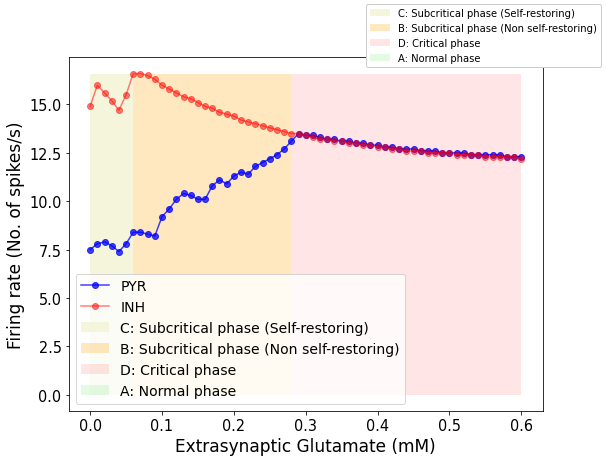

In [3]:
file = open("MOTIF2/glutamate_analysis_1.pkl",'rb') 
fr_dict = pkl.load(file)
fr_pre = fr_dict['fr_pre']
fr_post = fr_dict['fr_post']
glu_val_range = np.arange(0,0.61, 0.01)
fig, ax = plt.subplots(figsize=(8.5,6.5))
#mpl.style.use('seaborn')

fr1, = ax.plot(glu_val_range, np.array(fr_pre)*1000, 'o-', color='blue', alpha=0.75, label='PYR')
fr2, = ax.plot(glu_val_range, np.array(fr_post)*1000, 'o-', color='red', alpha=0.5, label='INH')
ax.set_xlabel('Extrasynaptic Glutamate (mM)', fontsize=17)
ax.set_ylabel('Firing rate (No. of spikes/s)', fontsize=17)
ax.tick_params(axis='both', which='major', labelsize=14.5)
max_fr = max(max(np.array(fr_pre)*1000), max(np.array(fr_post)*1000))

fill1 = ax.fill_between(glu_val_range, max_fr, where = glu_val_range<=0.06, facecolor='beige', alpha=1, label='C: Subcritical phase (Self-restoring)')
fill2 = ax.fill_between(glu_val_range, max_fr, where = np.logical_and((glu_val_range>=0.06), (glu_val_range<=0.28)), facecolor='orange', alpha=0.25, label='B: Subcritical phase (Non self-restoring)')
fill3 = ax.fill_between(glu_val_range, max_fr, where = glu_val_range>=0.28, facecolor='red', alpha=0.1, label='D: Critical phase')
fill4 = ax.fill_between(glu_val_range, max_fr, where = glu_val_range==0, facecolor='lightgreen', alpha=0.25, label='A: Normal phase')
zone_legend = plt.legend(ncol = 4, handles = [fill4, fill2, fill1, fill3], fontsize=14, frameon=True, framealpha=1);
f = zone_legend.figure
f.canvas.draw()
bbox  = zone_legend.get_window_extent().transformed(f.dpi_scale_trans.inverted())
f.savefig('Legend2_Figure1.png', bbox_inches=bbox)
fig.legend(handles=[fill1, fill2, fill3, fill4], frameon=True, framealpha=1)
plt.legend(loc='best', fontsize=14)
plt.savefig('Results/motif2_glu_regions.png', bbox_inches='tight')




## ATP analysis

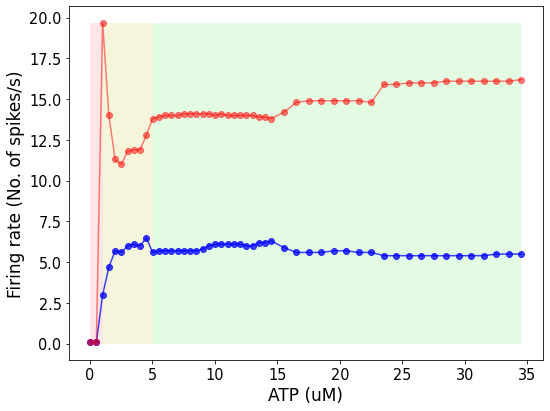

In [4]:
file = open("MOTIF2/atp_dependency_1.pkl",'rb')
fr_dict = pkl.load(file)
fr_pre = fr_dict['fr_pre']
fr_post = fr_dict['fr_post']
atp_levels = list(np.arange(0.01, 15, 0.5))
atp_levels2 = list(np.arange(atp_levels[-1] , 35, 1))
atp_levels.extend(atp_levels2)
atp_levels.remove(14.51)
atp_levels = np.array(atp_levels.copy())
#mpl.style.use('seaborn')
max_fr = max(max(np.array(fr_pre)*1000), max(np.array(fr_post)*1000))

fig, ax = plt.subplots(figsize=(8.5,6.5))
ax.plot(atp_levels, np.array(fr_pre)*1000, 'o-', color='blue', alpha=0.75, label='PYR')
ax.plot(atp_levels, np.array(fr_post)*1000, 'o-', color='red', alpha=0.5, label='INH')
ax.set_xlabel('ATP (uM)', fontsize=17)
ax.set_ylabel('Firing rate (No. of spikes/s)', fontsize=17)
ax.tick_params(axis='both', which='major', labelsize=14.5)
#plt.legend(loc='best', fontsize=14)
fill5 = ax.fill_between(atp_levels, max_fr, where = np.logical_and((atp_levels>=1.01), (atp_levels<=5.01)), facecolor='beige', alpha=1, label='Subcritical phase (self restorating)')
fill1 = ax.fill_between(atp_levels, max_fr, where = atp_levels<=1.01, facecolor='red', alpha=0.1, label='Critical phase')
fill3 = ax.fill_between(atp_levels, max_fr, where = atp_levels>=5.01, facecolor='lightgreen', alpha=0.25, label='Normal phase')
plt.savefig('Results/motif2_atp_regions.png', bbox_inches='tight')

## Extracellular resting potassium concentration

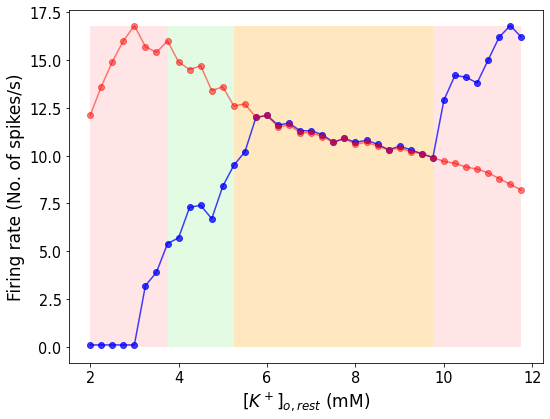

In [5]:
file = open("MOTIF2/Ko_dependency_1.pkl",'rb')
fr_dict = pkl.load(file)
fr_pre = fr_dict['fr_pre']
fr_post = fr_dict['fr_post']
xrange = np.array(list(np.arange(2, 12, 0.25)))
max_fr = max(max(np.array(fr_pre)*1000), max(np.array(fr_post)*1000))
fig, ax = plt.subplots(figsize=(8.5,6.5))

#mpl.style.use('seaborn')
ax.plot(xrange, np.array(fr_pre)*1000, 'o-', color='blue', alpha=0.75, label='PYR')
ax.plot(xrange, np.array(fr_post)*1000, 'o-', color='red', alpha=0.5, label='INH')
ax.set_xlabel('$[K^+]_{o, rest}$ (mM)', fontsize=17)
ax.set_ylabel('Firing rate (No. of spikes/s)', fontsize=17)
ax.tick_params(axis='both', which='major', labelsize=14.5)

ax.fill_between(xrange, max_fr, where = xrange<=3.75, facecolor='red', alpha=0.1, label='Critical phase')
ax.fill_between(xrange, max_fr, where = np.logical_and((xrange>=3.75), (xrange<=5.25)), facecolor='lightgreen', alpha=0.25, label='Normal phase')
ax.fill_between(xrange, max_fr, where = np.logical_and((xrange>=5.25), (xrange<=9.75)), facecolor='orange', alpha=0.25, label='SubCritical phase')
ax.fill_between(xrange, max_fr, where = xrange>=9.75, facecolor='red', alpha=0.1, label='Critical phase')

plt.savefig('Results/motif2_Ko_regions.png', bbox_inches='tight')

# STIMULATION

## AC Stimulation

### Glutamate AC stimulation

In [6]:
max_fr_rate = []
glue = [0, 0.06, 0.2, 0.29, 0.45]
file1 = open("MOTIF2/glutamate_acstim_analysis_bn_1.pkl",'rb')
file2 = open("MOTIF2/glutamate_acstim_analysis_pyr_1.pkl",'rb')
file3 = open("MOTIF2/glutamate_acstim_analysis_inh_1.pkl",'rb')
fr_dict1 = pkl.load(file1)
fr_dict2 = pkl.load(file2)
fr_dict3 = pkl.load(file3)
for i in range(len(glue)):
    fr_array1 = np.array(fr_dict1[glue[i]][0])*1000
    fr_array2 = np.array(fr_dict1[glue[i]][1])*1000
    max_fr_rate.append(np.max(np.array(fr_dict1[glue[i]][0])*1000))
    max_fr_rate.append(np.max(np.array(fr_dict1[glue[i]][1])*1000))
    max_fr_rate.append(np.max(np.array(fr_dict2[glue[i]][0])*1000))
    max_fr_rate.append(np.max(np.array(fr_dict2[glue[i]][1])*1000))
    max_fr_rate.append(np.max(np.array(fr_dict3[glue[i]][0])*1000))
    max_fr_rate.append(np.max(np.array(fr_dict3[glue[i]][1])*1000))

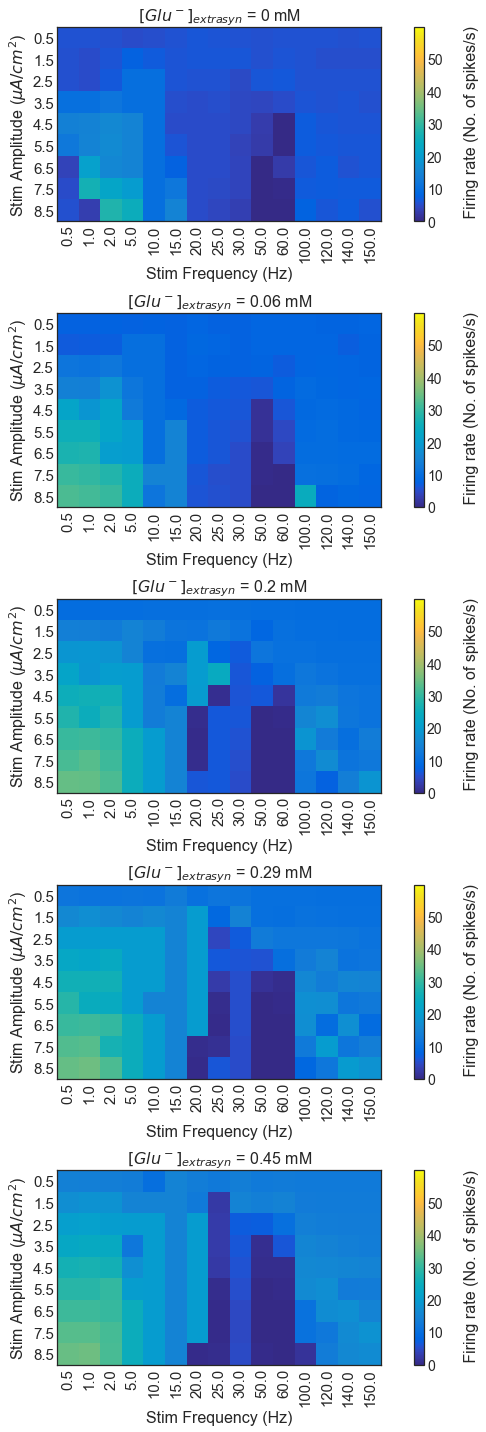

In [7]:
mpl.style.use('seaborn-white')

file = open("MOTIF2/glutamate_acstim_analysis_bn_1.pkl",'rb') 
fr_dict = pkl.load(file)

glue = [0, 0.06, 0.2, 0.29, 0.45]
ac_amp = np.arange(0.5,9)
ac_freq = [0.5,1,2,5,10,15,20,25,30,50,60,100,120,140, 150]
yticks = [i for i in range(len(ac_amp))]
xticks = [i for i in range(len(ac_freq))]

fig, ax_l = plt.subplots(len(glue), 1, figsize=(10,20))



for i in range(len(glue)):
    fr_array = np.array(fr_dict[glue[i]][0])*1000
    im = ax_l[i].imshow(fr_array, cmap=parula_map,  vmin = 0, vmax = max(max_fr_rate) )
    ax_l[i].set_xticks(xticks)
    ax_l[i].set_xticklabels([float(i) for i in np.array(ac_freq)[xticks]], fontsize=15, rotation=90)
    ax_l[i].set_yticks(yticks)
    ax_l[i].set_yticklabels([i for i in np.array(ac_amp)[yticks]], fontsize=15, rotation=0)

    ax_l[i].set_ylabel('Stim Amplitude ($\mu A/cm^2$)', fontsize=16)
    ax_l[i].set_xlabel('Stim Frequency (Hz)', fontsize=16)
    cbar = plt.colorbar(im, ax=ax_l[i], fraction=0.04)
    cbar.set_label('\n Firing rate (No. of spikes/s)', rotation=90, fontsize=16)
    cbar.ax.tick_params(labelsize=14)

    ax_l[i].set_title('$[Glu^-]_{extrasyn}$'+' = {} mM'.format(glue[i]), fontsize=16)


plt.tight_layout()
plt.savefig('Results/motif2_glutamate_ACstim_PYR_bn.png', bbox_inches='tight')
    

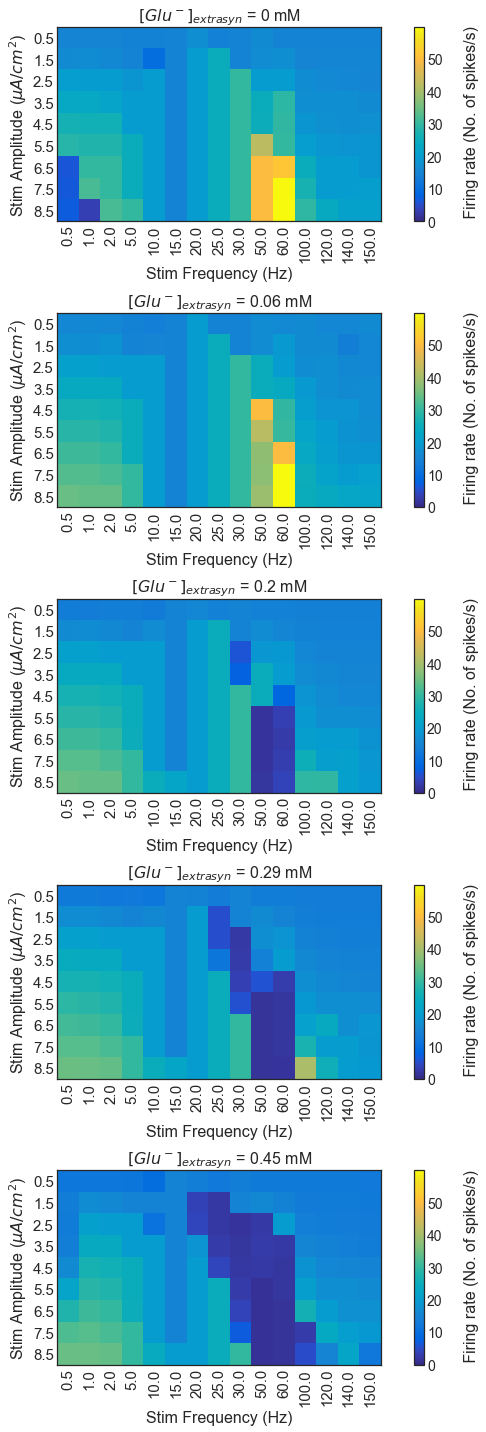

In [8]:
mpl.style.use('seaborn-white')

file = open("MOTIF2/glutamate_acstim_analysis_bn_1.pkl",'rb') 
fr_dict = pkl.load(file)

glue = [0, 0.06, 0.2, 0.29, 0.45]
ac_amp = np.arange(0.5,9)
ac_freq = [0.5,1,2,5,10,15,20,25,30,50,60,100,120,140, 150]
yticks = [i for i in range(len(ac_amp))]
xticks = [i for i in range(len(ac_freq))]

fig, ax_l = plt.subplots(len(glue), 1, figsize=(10,20))

max_fr1 = []
max_fr2 = []
for i in range(len(glue)):
    fr_array1 = np.array(fr_dict[glue[i]][0])*1000
    fr_array2 = np.array(fr_dict[glue[i]][1])*1000
    max_fr1.append(np.max(fr_array1))
    max_fr2.append(np.max(fr_array2))

for i in range(len(glue)):
    fr_array = np.array(fr_dict[glue[i]][1])*1000
    im = ax_l[i].imshow(fr_array, cmap=parula_map, vmin = 0, vmax =  max(max_fr_rate))
    ax_l[i].set_xticks(xticks)
    ax_l[i].set_xticklabels([float(i) for i in np.array(ac_freq)[xticks]], fontsize=15, rotation=90)
    ax_l[i].set_yticks(yticks)
    ax_l[i].set_yticklabels([i for i in np.array(ac_amp)[yticks]], fontsize=15, rotation=0)

    ax_l[i].set_ylabel('Stim Amplitude ($\mu A/cm^2$)', fontsize=16)
    ax_l[i].set_xlabel('Stim Frequency (Hz)', fontsize=16)
    cbar = plt.colorbar(im, ax=ax_l[i], fraction=0.04)
    cbar.set_label('\n Firing rate (No. of spikes/s)', rotation=90, fontsize=16)
    cbar.ax.tick_params(labelsize=14)

    ax_l[i].set_title('$[Glu^-]_{extrasyn}$'+' = {} mM'.format(glue[i]), fontsize=16)


plt.tight_layout()
plt.savefig('Results/motif2_glutamate_ACstim_INH_bn.png', bbox_inches='tight')
    

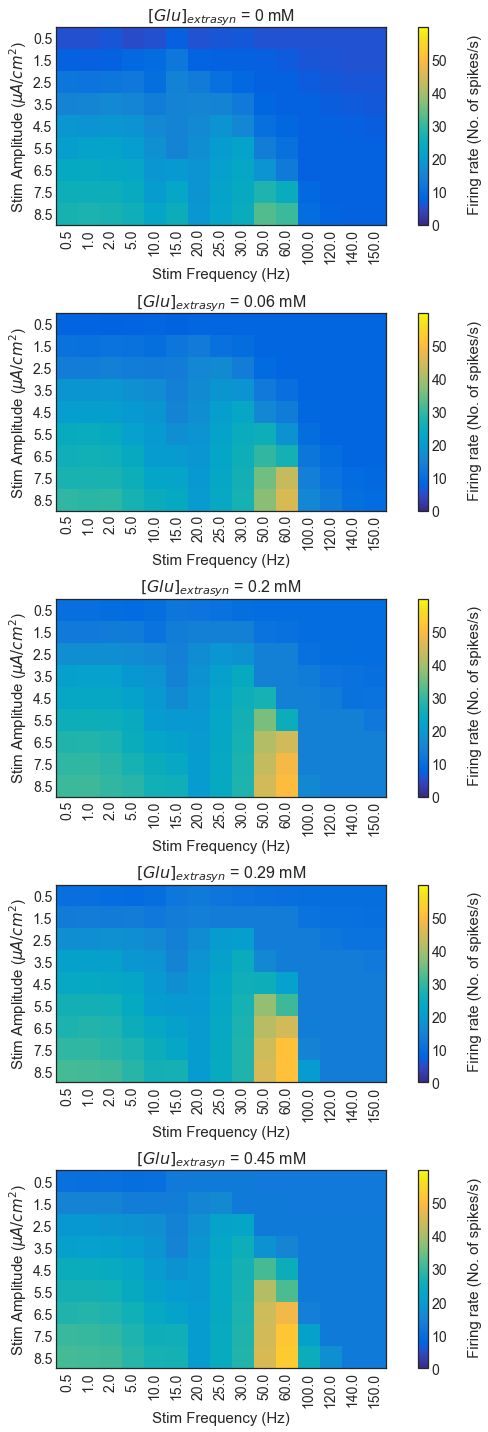

In [9]:
mpl.style.use('seaborn-white')

file = open("MOTIF2/glutamate_acstim_analysis_pyr_1.pkl",'rb') 
fr_dict = pkl.load(file)

glue = [0, 0.06, 0.2, 0.29, 0.45]
ac_amp = np.arange(0.5,9)
ac_freq = [0.5,1,2,5,10,15,20,25,30,50,60,100,120,140, 150]
yticks = [i for i in range(len(ac_amp))]
xticks = [i for i in range(len(ac_freq))]

fig, ax_l = plt.subplots(len(glue), 1, figsize=(10,20))

for i in range(len(glue)):
    fr_array1 = np.array(fr_dict[glue[i]][0])*1000
    fr_array2 = np.array(fr_dict[glue[i]][1])*1000
    max_fr1.append(np.max(fr_array1))
    max_fr2.append(np.max(fr_array2))



for i in range(len(glue)):
    fr_array = np.array(fr_dict[glue[i]][0])*1000
    im = ax_l[i].imshow(fr_array, cmap=parula_map,  vmin = 0, vmax = max(max_fr_rate))
    ax_l[i].set_xticks(xticks)
    ax_l[i].set_xticklabels([float(i) for i in np.array(ac_freq)[xticks]], fontsize=14, rotation=90)
    ax_l[i].set_yticks(yticks)
    ax_l[i].set_yticklabels([i for i in np.array(ac_amp)[yticks]], fontsize=14, rotation=0)

    ax_l[i].set_ylabel('Stim Amplitude ($\mu A/cm^2$)', fontsize=15)
    ax_l[i].set_xlabel('Stim Frequency (Hz)', fontsize=15)
    cbar = plt.colorbar(im, ax=ax_l[i], fraction=0.03)
    cbar.set_label('\n Firing rate (No. of spikes/s)', rotation=90, fontsize=15)
    cbar.ax.tick_params(labelsize=14)

    ax_l[i].set_title('$[Glu]_{extrasyn}$'+' = {} mM'.format(glue[i]), fontsize=16)

plt.tight_layout()
plt.savefig('Results/motif2_glutamate_ACstim_PYR_pyr.png', bbox_inches='tight')
    

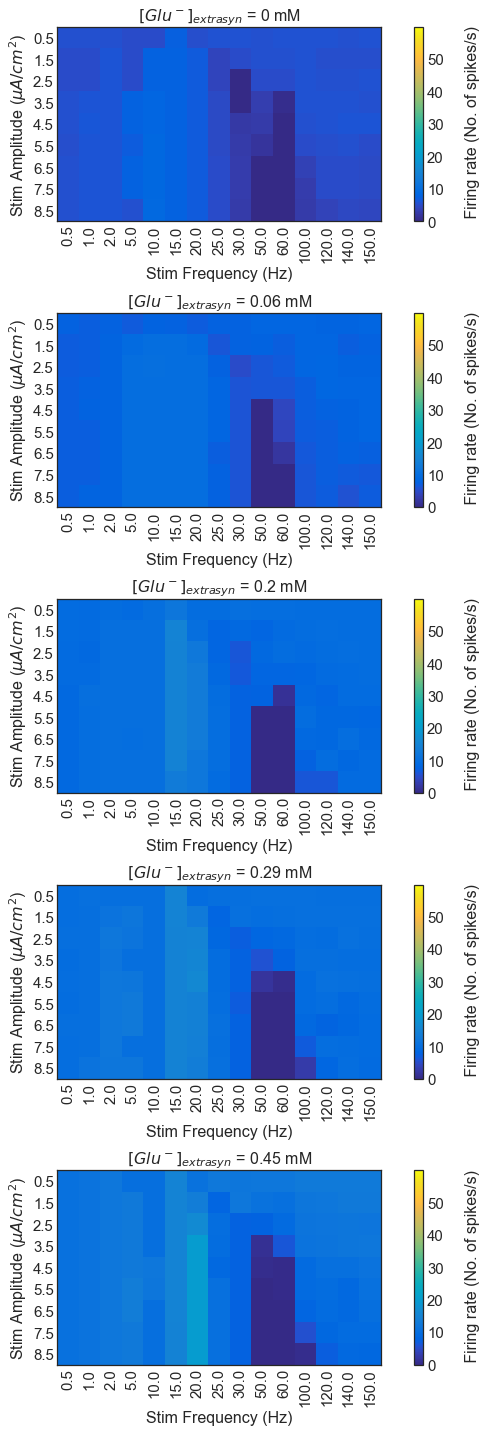

In [10]:
mpl.style.use('seaborn-white')

file = open("MOTIF2/glutamate_acstim_analysis_inh_1.pkl",'rb') 
fr_dict = pkl.load(file)

glue = [0, 0.06, 0.2, 0.29, 0.45]
ac_amp = np.arange(0.5,9)
ac_freq = [0.5,1,2,5,10,15,20,25,30,50,60,100,120,140, 150]
yticks = [i for i in range(len(ac_amp))]
xticks = [i for i in range(len(ac_freq))]

fig, ax_l = plt.subplots(len(glue), 1, figsize=(10,20))




for i in range(len(glue)):
    fr_array = np.array(fr_dict[glue[i]][0])*1000
    im = ax_l[i].imshow(fr_array, cmap=parula_map,  vmin = 0, vmax = max(max_fr_rate))
    ax_l[i].set_xticks(xticks)
    ax_l[i].set_xticklabels([float(i) for i in np.array(ac_freq)[xticks]], fontsize=15, rotation=90)
    ax_l[i].set_yticks(yticks)
    ax_l[i].set_yticklabels([i for i in np.array(ac_amp)[yticks]], fontsize=15, rotation=0)

    ax_l[i].set_ylabel('Stim Amplitude ($\mu A/cm^2$)', fontsize=16)
    ax_l[i].set_xlabel('Stim Frequency (Hz)', fontsize=16)
    cbar = plt.colorbar(im, ax=ax_l[i], fraction=0.04)
    cbar.set_label('\n Firing rate (No. of spikes/s)', rotation=90, fontsize=16)
    cbar.ax.tick_params(labelsize=15)

    ax_l[i].set_title('$[Glu^-]_{extrasyn}$'+' = {} mM'.format(glue[i]), fontsize=16)


plt.tight_layout()
plt.savefig('Results/motif2_glutamate_ACstim_PYR_inh.png', bbox_inches='tight')
    

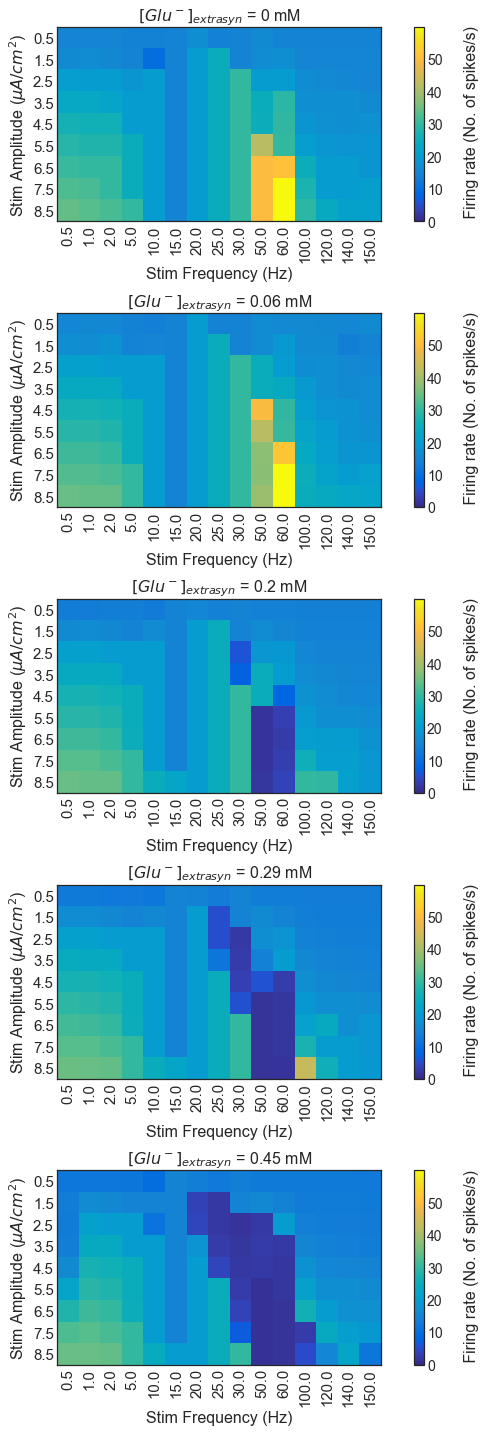

In [11]:
mpl.style.use('seaborn-white')

file = open("MOTIF2/glutamate_acstim_analysis_inh_1.pkl",'rb') 
fr_dict = pkl.load(file)

glue = [0, 0.06, 0.2, 0.29, 0.45]
ac_amp = np.arange(0.5,9)
ac_freq = [0.5,1,2,5,10,15,20,25,30,50,60,100,120,140, 150]
yticks = [i for i in range(len(ac_amp))]
xticks = [i for i in range(len(ac_freq))]

fig, ax_l = plt.subplots(len(glue), 1, figsize=(10,20))




for i in range(len(glue)):
    fr_array = np.array(fr_dict[glue[i]][1])*1000
    im = ax_l[i].imshow(fr_array, cmap=parula_map,  vmin = 0, vmax = max(max_fr_rate))
    ax_l[i].set_xticks(xticks)
    ax_l[i].set_xticklabels([float(i) for i in np.array(ac_freq)[xticks]], fontsize=15, rotation=90)
    ax_l[i].set_yticks(yticks)
    ax_l[i].set_yticklabels([i for i in np.array(ac_amp)[yticks]], fontsize=15, rotation=0)

    ax_l[i].set_ylabel('Stim Amplitude ($\mu A/cm^2$)', fontsize=16)
    ax_l[i].set_xlabel('Stim Frequency (Hz)', fontsize=16)
    cbar = plt.colorbar(im, ax=ax_l[i], fraction=0.04)
    cbar.set_label('\n Firing rate (No. of spikes/s)', rotation=90, fontsize=16)
    cbar.ax.tick_params(labelsize=14)

    ax_l[i].set_title('$[Glu^-]_{extrasyn}$'+' = {} mM'.format(glue[i]), fontsize=16)


plt.tight_layout()
plt.savefig('Results/motif2_glutamate_ACstim_INH_inh.png', bbox_inches='tight')
    

### Ko AC Stim

In [13]:
max_fr_rate = []
file1 = open("MOTIF2/Ko_acstim_analysis_bn_1.pkl",'rb')
file2 = open("MOTIF2/Ko_acstim_analysis_pyr_1.pkl",'rb')
file3 = open("MOTIF2/Ko_acstim_analysis_inh_1.pkl",'rb')

fr_dict1 = pkl.load(file1)
fr_dict2 = pkl.load(file2)
fr_dict3 = pkl.load(file3)
ko = list(fr_dict1.keys())
for i in range(len(ko)):
    fr_array1 = np.array(fr_dict1[ko[i]][0])*1000
    fr_array2 = np.array(fr_dict1[ko[i]][1])*1000
    max_fr_rate.append(np.max(np.array(fr_dict1[ko[i]][0])*1000))
    max_fr_rate.append(np.max(np.array(fr_dict1[ko[i]][1])*1000))
    max_fr_rate.append(np.max(np.array(fr_dict2[ko[i]][0])*1000))
    max_fr_rate.append(np.max(np.array(fr_dict2[ko[i]][1])*1000))
    max_fr_rate.append(np.max(np.array(fr_dict3[ko[i]][0])*1000))
    max_fr_rate.append(np.max(np.array(fr_dict3[ko[i]][1])*1000))

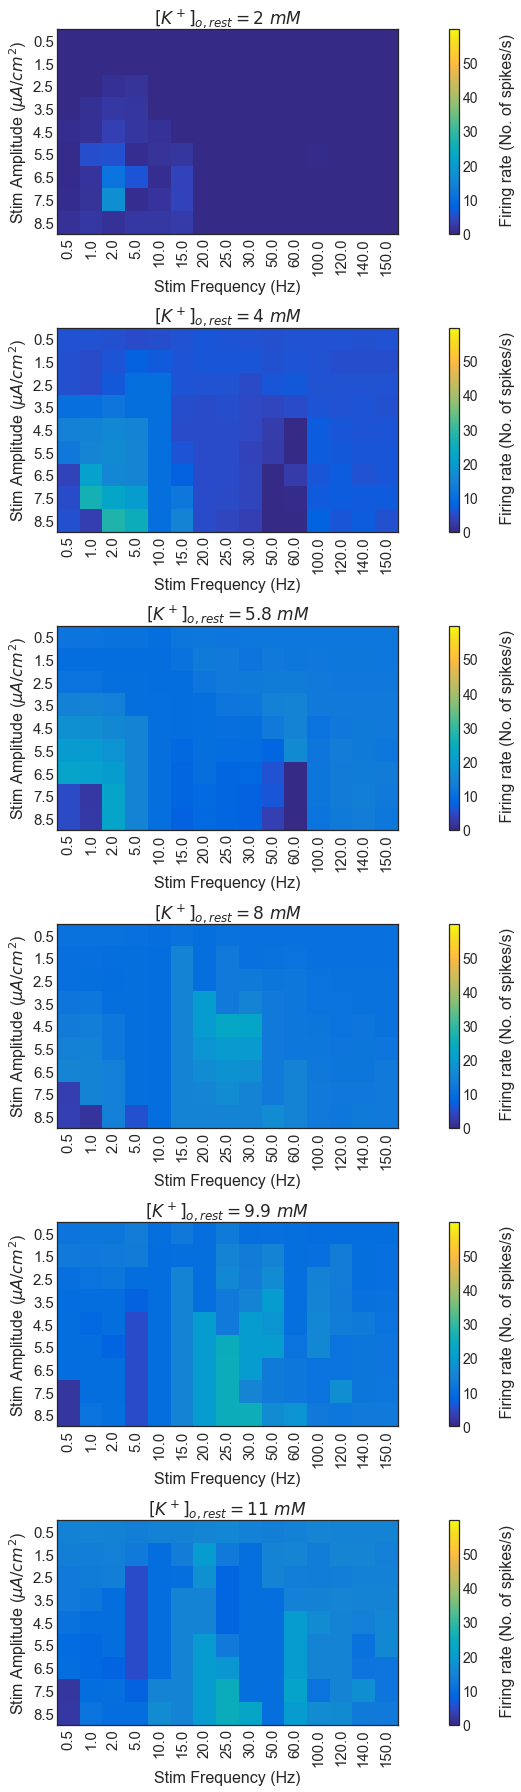

In [14]:
file = open("MOTIF2/Ko_acstim_analysis_bn_1.pkl",'rb') 
fr_dict = pkl.load(file)
ko = list(fr_dict.keys())

mpl.style.use('seaborn-white')
fig, ax_l = plt.subplots(len(ko), 1, figsize=(15,25))

ac_amp = np.arange(0.5,9)
ac_freq = [0.5,1,2,5,10,15,20,25,30,50,60,100,120,140, 150]
yticks = [i for i in range(len(ac_amp))]
xticks = [i for i in range(len(ac_freq))]


for i in range(len(ko)):
    fr_array = np.array(fr_dict[ko[i]][0])*1000
    im = ax_l[i].imshow(fr_array, cmap=parula_map,  vmin=0,vmax = max(max_fr_rate))
    ax_l[i].set_xticks(xticks)
    ax_l[i].set_xticklabels([float(i) for i in np.array(ac_freq)[xticks]], fontsize=15, rotation=90)
    ax_l[i].set_yticks(yticks)
    ax_l[i].set_yticklabels([i for i in np.array(ac_amp)[yticks]], fontsize=15, rotation=0)
    ax_l[i].set_ylabel('Stim Amplitude ($\mu A/cm^2$)', fontsize=16)
    ax_l[i].set_xlabel('Stim Frequency (Hz)', fontsize=16)
    cbar = plt.colorbar(im, ax=ax_l[i], fraction=0.03)
    cbar.set_label('\n Firing rate (No. of spikes/s)', rotation=90, fontsize=16)
    cbar.ax.tick_params(labelsize=14)
    ax_l[i].set_title('$[K^+]_{o,rest}$'+'$ = {} \ mM$'.format(ko[i]), fontsize=17)

plt.tight_layout()
plt.savefig('Results/motif2_Ko_ACstim_PYR_bn.png', bbox_inches='tight')
    

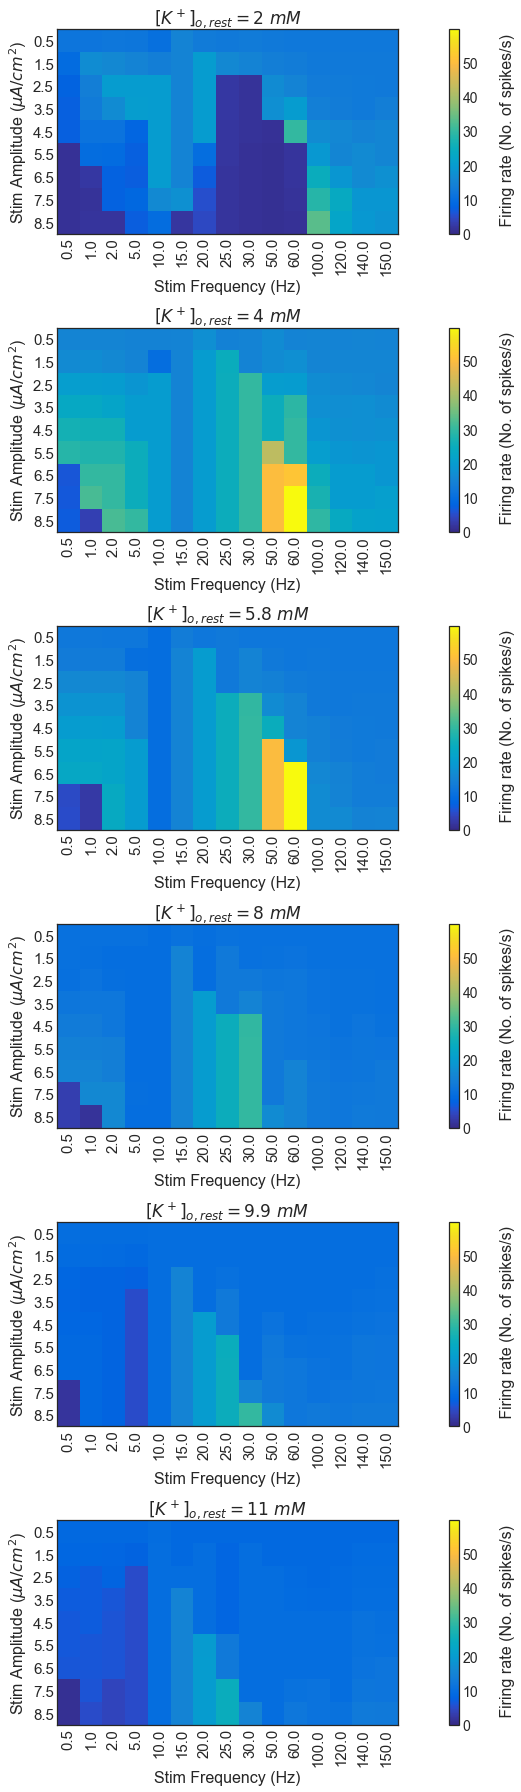

In [15]:
file = open("MOTIF2/Ko_acstim_analysis_bn_1.pkl",'rb') 
fr_dict = pkl.load(file)
ko = list(fr_dict.keys())

mpl.style.use('seaborn-white')
fig, ax_l = plt.subplots(len(ko), 1, figsize=(15,25))

ac_amp = np.arange(0.5,9)
ac_freq = [0.5,1,2,5,10,15,20,25,30,50,60,100,120,140, 150]
yticks = [i for i in range(len(ac_amp))]
xticks = [i for i in range(len(ac_freq))]


for i in range(len(ko)):
    fr_array = np.array(fr_dict[ko[i]][1])*1000
    im = ax_l[i].imshow(fr_array, cmap=parula_map, vmin=0, vmax = max(max_fr_rate))
    ax_l[i].set_xticks(xticks)
    ax_l[i].set_xticklabels([float(i) for i in np.array(ac_freq)[xticks]], fontsize=15, rotation=90)
    ax_l[i].set_yticks(yticks)
    ax_l[i].set_yticklabels([i for i in np.array(ac_amp)[yticks]], fontsize=15, rotation=0)
    ax_l[i].set_ylabel('Stim Amplitude ($\mu A/cm^2$)', fontsize=16)
    ax_l[i].set_xlabel('Stim Frequency (Hz)', fontsize=16)
    cbar = plt.colorbar(im, ax=ax_l[i], fraction=0.03)
    cbar.set_label('\n Firing rate (No. of spikes/s)', rotation=90, fontsize=16)
    cbar.ax.tick_params(labelsize=14)
    ax_l[i].set_title('$[K^+]_{o,rest}$'+'$ = {} \ mM$'.format(ko[i]), fontsize=17)
plt.tight_layout()
plt.savefig('Results/motif2_Ko_ACstim_INH_bn.png', bbox_inches='tight')
    

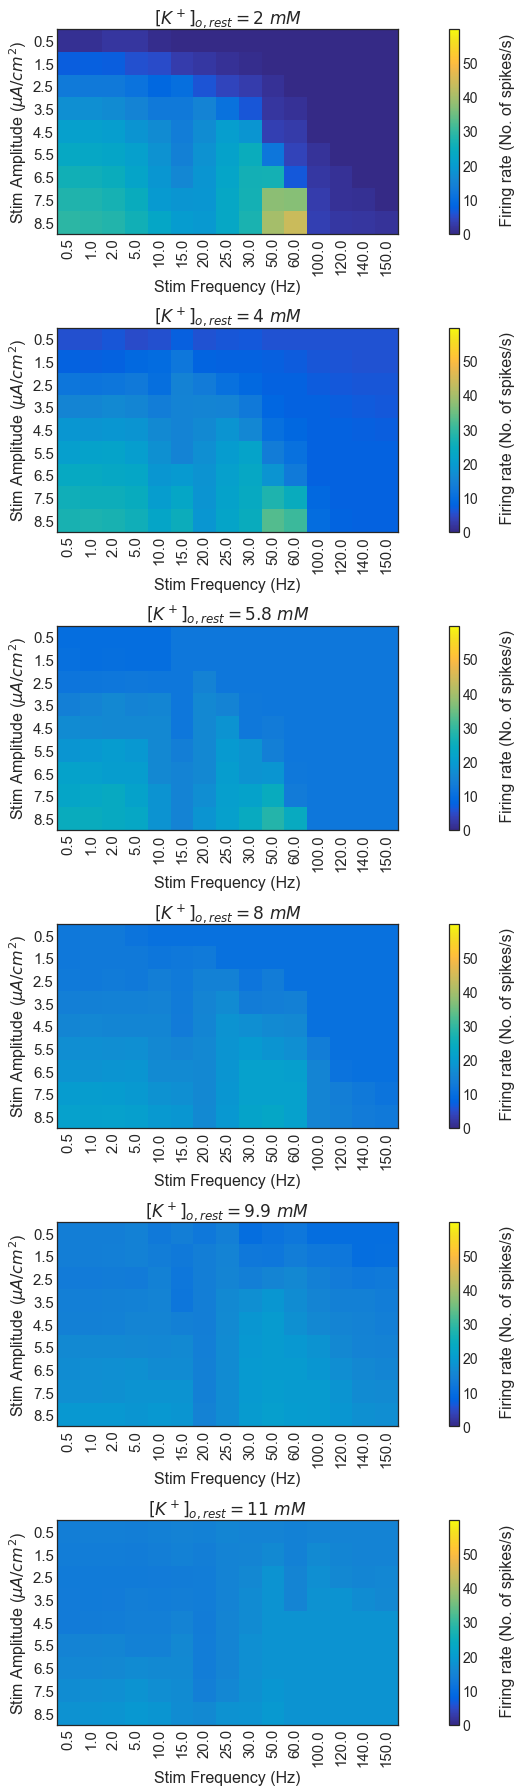

In [16]:
file = open("MOTIF2/Ko_acstim_analysis_pyr_1.pkl",'rb') 
fr_dict = pkl.load(file)
ko = list(fr_dict.keys())

mpl.style.use('seaborn-white')
fig, ax_l = plt.subplots(len(ko), 1, figsize=(15,25))

ac_amp = np.arange(0.5,9)
ac_freq = [0.5,1,2,5,10,15,20,25,30,50,60,100,120,140, 150]
yticks = [i for i in range(len(ac_amp))]
xticks = [i for i in range(len(ac_freq))]



for i in range(len(ko)):
    fr_array = np.array(fr_dict[ko[i]][0])*1000
    im = ax_l[i].imshow(fr_array, cmap=parula_map, vmin=0, vmax = max(max_fr_rate))
    ax_l[i].set_xticks(xticks)
    ax_l[i].set_xticklabels([float(i) for i in np.array(ac_freq)[xticks]], fontsize=15, rotation=90)
    ax_l[i].set_yticks(yticks)
    ax_l[i].set_yticklabels([i for i in np.array(ac_amp)[yticks]], fontsize=15, rotation=0)
    ax_l[i].set_ylabel('Stim Amplitude ($\mu A/cm^2$)', fontsize=16)
    ax_l[i].set_xlabel('Stim Frequency (Hz)', fontsize=16)
    cbar = plt.colorbar(im, ax=ax_l[i], fraction=0.03)
    cbar.set_label('\n Firing rate (No. of spikes/s)', rotation=90, fontsize=16)
    cbar.ax.tick_params(labelsize=14)
    ax_l[i].set_title('$[K^+]_{o,rest}$'+'$ = {} \ mM$'.format(ko[i]), fontsize=17)
plt.tight_layout()
plt.savefig('Results/motif2_Ko_ACstim_PYR_pyr.png', bbox_inches='tight')
    

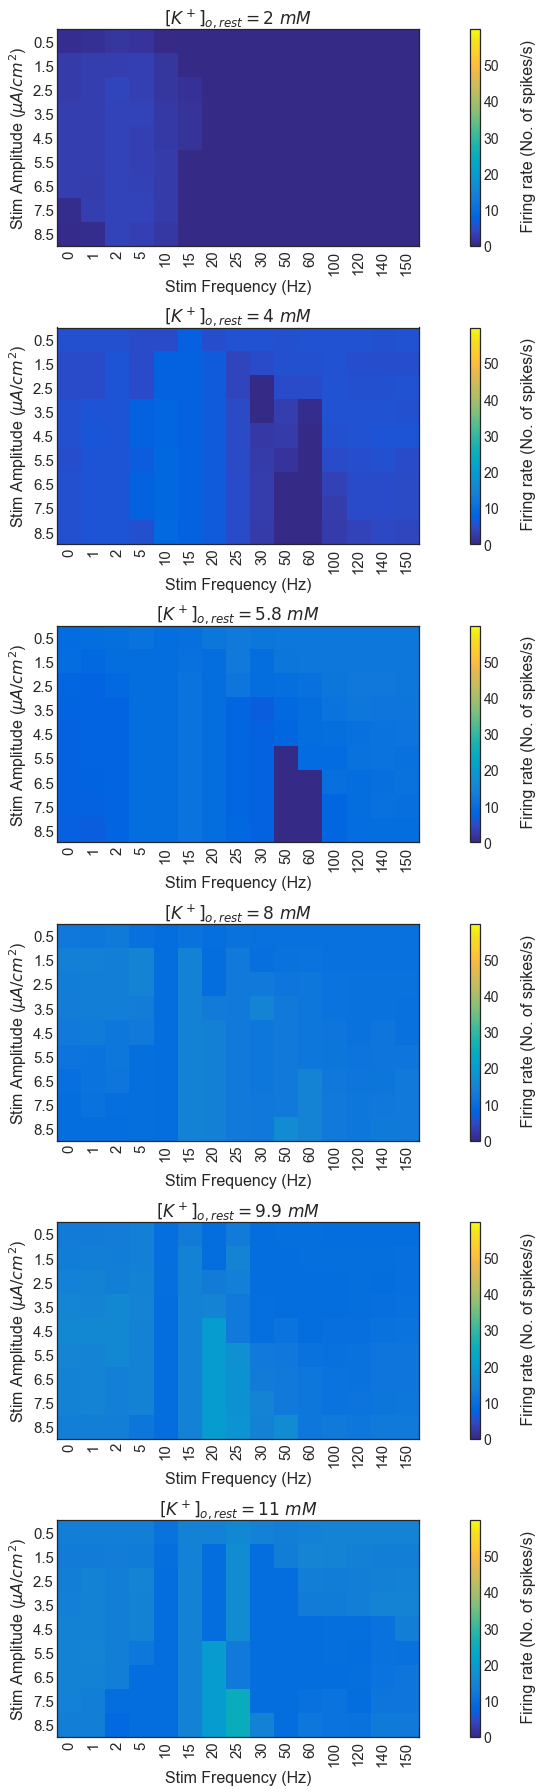

In [17]:
file = open("MOTIF2/Ko_acstim_analysis_inh_1.pkl",'rb') 
fr_dict = pkl.load(file)
ko = list(fr_dict.keys())

mpl.style.use('seaborn-white')
fig, ax_l = plt.subplots(len(ko), 1, figsize=(15,25))

ac_amp = np.arange(0.5,9)
ac_freq = [0.5,1,2,5,10,15,20,25,30,50,60,100,120,140, 150]
yticks = [i for i in range(len(ac_amp))]
xticks = [i for i in range(len(ac_freq))]


for i in range(len(ko)):
    fr_array = np.array(fr_dict[ko[i]][0])*1000
    im = ax_l[i].imshow(fr_array, cmap=parula_map, vmin=0, vmax = max(max_fr_rate))
    ax_l[i].set_xticks(xticks)
    ax_l[i].set_xticklabels([int(i) for i in np.array(ac_freq)[xticks]], fontsize=15, rotation=90)
    ax_l[i].set_yticks(yticks)
    ax_l[i].set_yticklabels([i for i in np.array(ac_amp)[yticks]], fontsize=15, rotation=0)
    ax_l[i].set_ylabel('Stim Amplitude ($\mu A/cm^2$)', fontsize=16)
    ax_l[i].set_xlabel('Stim Frequency (Hz)', fontsize=16)
    cbar = plt.colorbar(im, ax=ax_l[i], fraction=0.03)
    cbar.set_label('\n Firing rate (No. of spikes/s)', rotation=90, fontsize=16)
    cbar.ax.tick_params(labelsize=14)
    ax_l[i].set_title('$[K^+]_{o,rest}$'+'$ = {} \ mM$'.format(ko[i]), fontsize=17)
plt.tight_layout()
plt.savefig('Results/motif2_Ko_ACstim_PYR_inh.png', bbox_inches='tight')
    

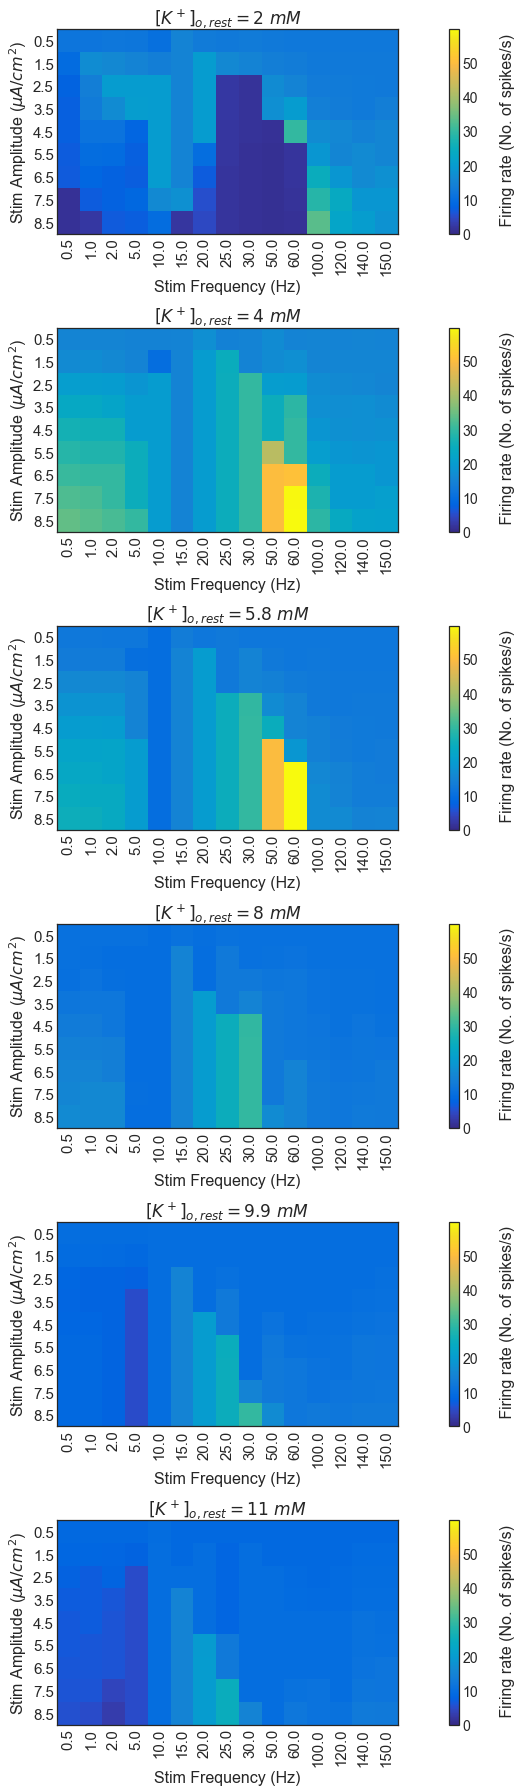

In [18]:
file = open("MOTIF2/Ko_acstim_analysis_inh_1.pkl",'rb') 
fr_dict = pkl.load(file)
ko = list(fr_dict.keys())

mpl.style.use('seaborn-white')
fig, ax_l = plt.subplots(len(ko), 1, figsize=(15,25))

ac_amp = np.arange(0.5,9)
ac_freq = [0.5,1,2,5,10,15,20,25,30,50,60,100,120,140, 150]
yticks = [i for i in range(len(ac_amp))]
xticks = [i for i in range(len(ac_freq))]


for i in range(len(ko)):
    fr_array = np.array(fr_dict[ko[i]][1])*1000
    im = ax_l[i].imshow(fr_array, cmap=parula_map,  vmin=0, vmax = max(max_fr_rate))
    ax_l[i].set_xticks(xticks)
    ax_l[i].set_xticklabels([float(i) for i in np.array(ac_freq)[xticks]], fontsize=15, rotation=90)
    ax_l[i].set_yticks(yticks)
    ax_l[i].set_yticklabels([i for i in np.array(ac_amp)[yticks]], fontsize=15, rotation=0)
    ax_l[i].set_ylabel('Stim Amplitude ($\mu A/cm^2$)', fontsize=16)
    ax_l[i].set_xlabel('Stim Frequency (Hz)', fontsize=16)
    cbar = plt.colorbar(im, ax=ax_l[i], fraction=0.03)
    cbar.set_label('\n Firing rate (No. of spikes/s)', rotation=90, fontsize=16)
    cbar.ax.tick_params(labelsize=14)
    ax_l[i].set_title('$[K^+]_{o,rest}$'+'$ = {} \ mM$'.format(ko[i]), fontsize=17)
plt.tight_layout()
plt.savefig('Results/motif2_Ko_ACstim_INH_inh.png', bbox_inches='tight')
    

### ATP AC stim

In [19]:
max_fr_rate = []
file1 = open("MOTIF2/atp_acstim_analysis_bn_1.pkl",'rb')
file2 = open("MOTIF2/atp_acstim_analysis_pyr_1.pkl",'rb')
file3 = open("MOTIF2/atp_acstim_analysis_inh_1.pkl",'rb')

fr_dict1 = pkl.load(file1)
fr_dict2 = pkl.load(file2)
fr_dict3 = pkl.load(file3)
atp = list(fr_dict1.keys())
for i in range(len(atp)):
    fr_array1 = np.array(fr_dict1[atp[i]][0])*1000
    fr_array2 = np.array(fr_dict1[atp[i]][1])*1000
    max_fr_rate.append(np.max(np.array(fr_dict1[atp[i]][0])*1000))
    max_fr_rate.append(np.max(np.array(fr_dict1[atp[i]][1])*1000))
    max_fr_rate.append(np.max(np.array(fr_dict2[atp[i]][0])*1000))
    max_fr_rate.append(np.max(np.array(fr_dict2[atp[i]][1])*1000))
    max_fr_rate.append(np.max(np.array(fr_dict3[atp[i]][0])*1000))
    max_fr_rate.append(np.max(np.array(fr_dict3[atp[i]][1])*1000))

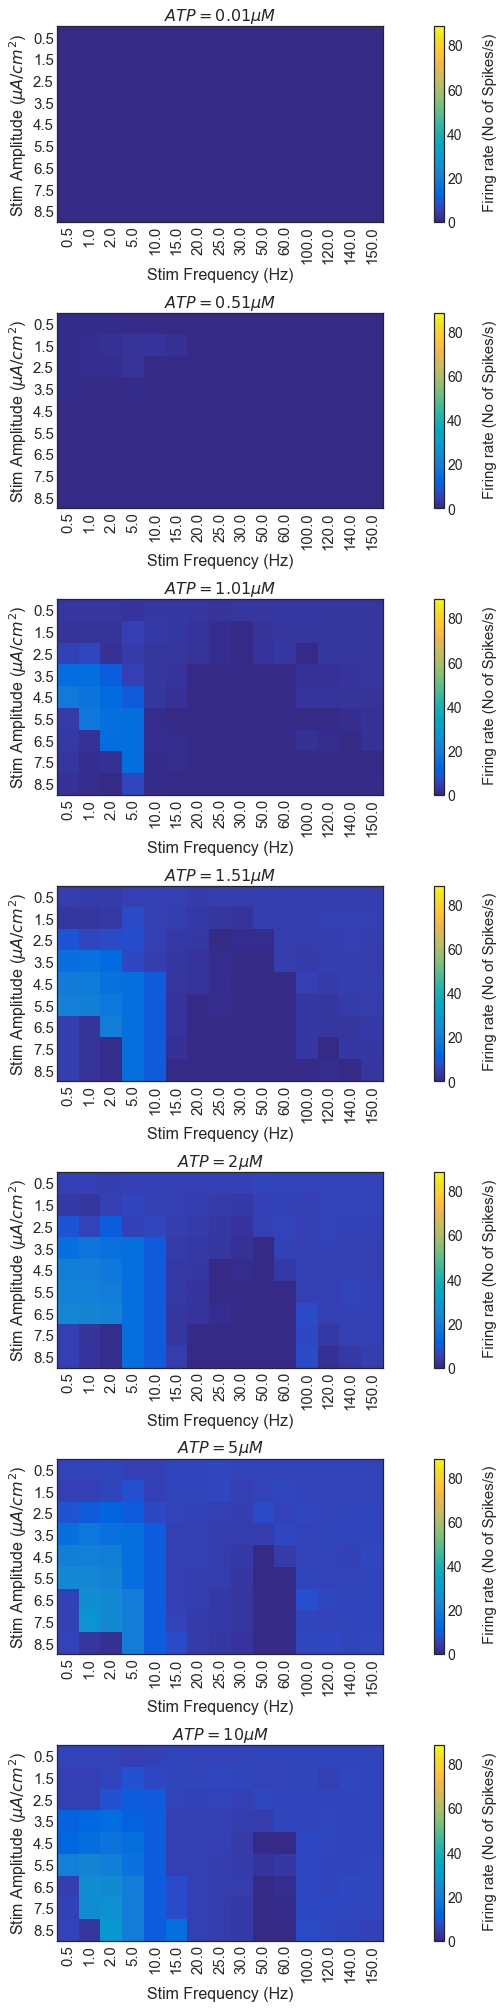

In [20]:
mpl.style.use('seaborn-white')
file = open("MOTIF2/atp_acstim_analysis_bn_1.pkl",'rb')
fr_dict = pkl.load(file)
atp = list(fr_dict.keys())

fig, ax_l = plt.subplots(len(atp),1, figsize=(15,28))
ac_amp = np.arange(0.5,9)
ac_freq = [0.5,1,2,5,10,15,20,25,30,50,60,100,120,140, 150]
yticks = [i for i in range(len(ac_amp))]
xticks = [i for i in range(len(ac_freq))]

for i in range(len(atp)):
    fr_array = np.array(fr_dict[atp[i]][0])*1000
    im = ax_l[i].imshow(fr_array, cmap=parula_map,  vmin=0, vmax=max(max_fr_rate))
    ax_l[i].set_xticks(xticks)
    ax_l[i].set_xticklabels([float(i) for i in np.array(ac_freq)[xticks]], fontsize=15, rotation=90)
    ax_l[i].set_yticks(yticks)
    ax_l[i].set_yticklabels([i for i in np.array(ac_amp)[yticks]], fontsize=15, rotation=0)

    ax_l[i].set_ylabel('Stim Amplitude ($\mu A/cm^2$)', fontsize=16)
    ax_l[i].set_xlabel('Stim Frequency (Hz)', fontsize=16)
    cbar = plt.colorbar(im, ax=ax_l[i], fraction=0.03)
    cbar.set_label('\n Firing rate (No of Spikes/s)', rotation=90, fontsize=15)
    cbar.ax.tick_params(labelsize=14)

    ax_l[i].set_title('$ ATP = {} \mu M$'.format(atp[i]), fontsize=16)
plt.tight_layout()
plt.savefig('Results/motif2_atp_ACstim_PYR_bn.png', bbox_inches='tight')
    

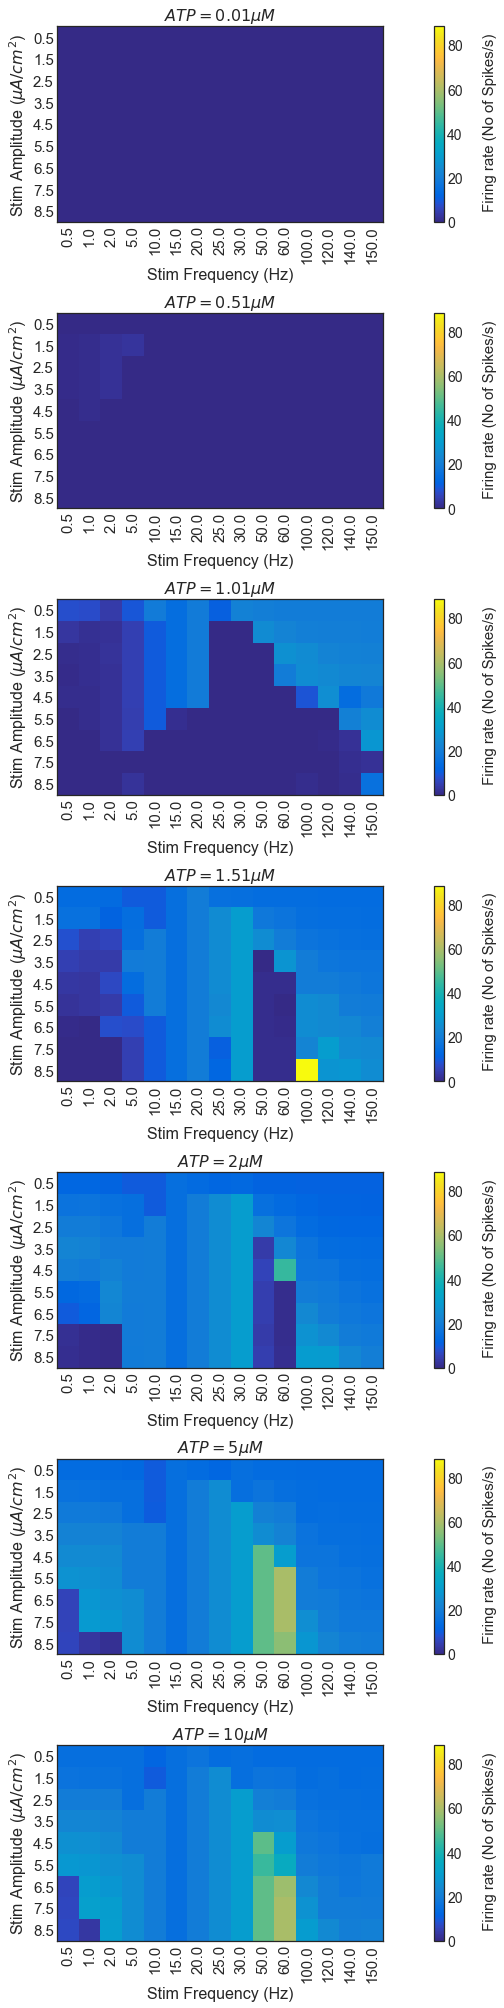

In [21]:
mpl.style.use('seaborn-white')
file = open("MOTIF2/atp_acstim_analysis_bn_1.pkl",'rb')
fr_dict = pkl.load(file)
atp = list(fr_dict.keys())

fig, ax_l = plt.subplots(len(atp),1, figsize=(15,28))
ac_amp = np.arange(0.5,9)
ac_freq = [0.5,1,2,5,10,15,20,25,30,50,60,100,120,140, 150]
yticks = [i for i in range(len(ac_amp))]
xticks = [i for i in range(len(ac_freq))]

    
for i in range(len(atp)):
    fr_array = np.array(fr_dict[atp[i]][1])*1000
    im = ax_l[i].imshow(fr_array, cmap=parula_map,  vmin=0, vmax=max(max_fr_rate))
    ax_l[i].set_xticks(xticks)
    ax_l[i].set_xticklabels([float(i) for i in np.array(ac_freq)[xticks]], fontsize=15, rotation=90)
    ax_l[i].set_yticks(yticks)
    ax_l[i].set_yticklabels([i for i in np.array(ac_amp)[yticks]], fontsize=15, rotation=0)

    ax_l[i].set_ylabel('Stim Amplitude ($\mu A/cm^2$)', fontsize=16)
    ax_l[i].set_xlabel('Stim Frequency (Hz)', fontsize=16)
    cbar = plt.colorbar(im, ax=ax_l[i], fraction=0.03)
    cbar.set_label('\n Firing rate (No of Spikes/s)', rotation=90, fontsize=15)
    cbar.ax.tick_params(labelsize=14)

    ax_l[i].set_title('$ ATP = {} \mu M$'.format(atp[i]), fontsize=16)
plt.tight_layout()
plt.savefig('Results/motif2_atp_ACstim_INH_bn.png', bbox_inches='tight')
    

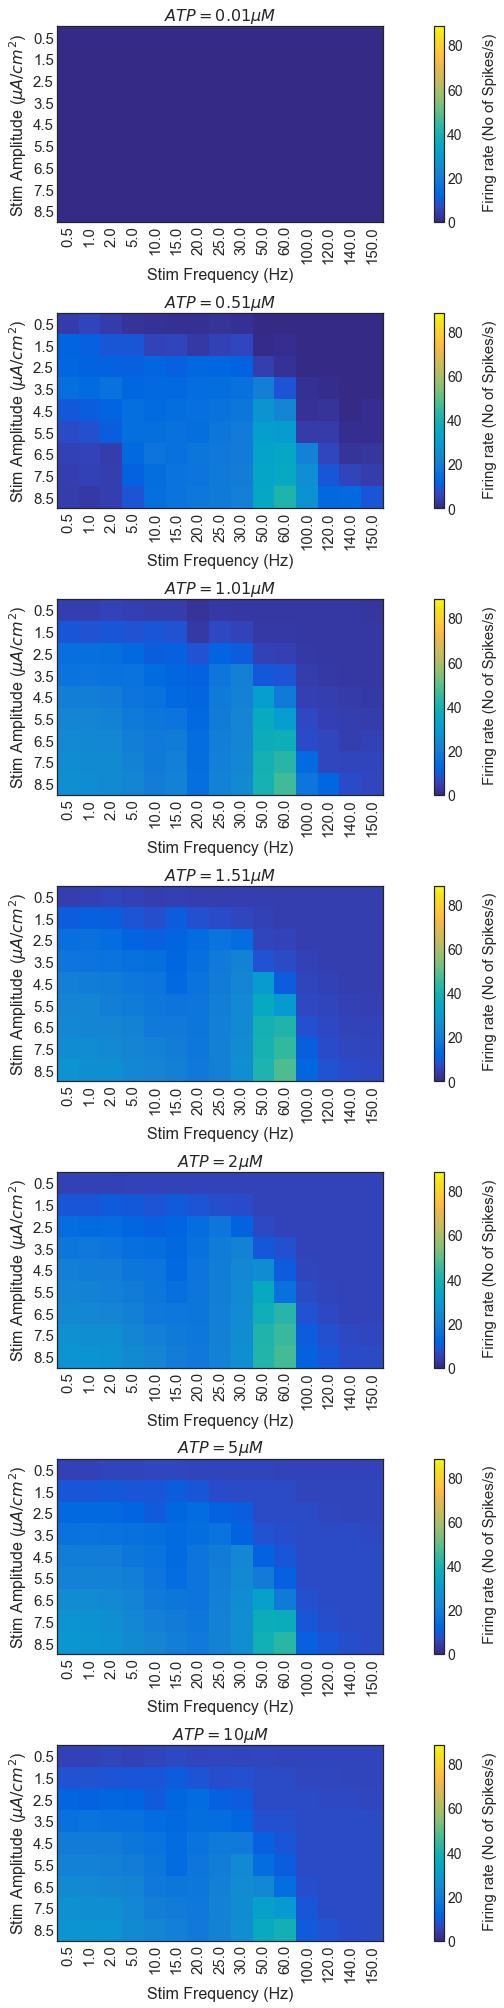

In [22]:
mpl.style.use('seaborn-white')
file = open("MOTIF2/atp_acstim_analysis_pyr_1.pkl",'rb')
fr_dict = pkl.load(file)
atp = list(fr_dict.keys())

fig, ax_l = plt.subplots(len(atp),1, figsize=(15,28))
ac_amp = np.arange(0.5,9)
ac_freq = [0.5,1,2,5,10,15,20,25,30,50,60,100,120,140, 150]
yticks = [i for i in range(len(ac_amp))]
xticks = [i for i in range(len(ac_freq))]

    
for i in range(len(atp)):
    fr_array = np.array(fr_dict[atp[i]][0])*1000
    im = ax_l[i].imshow(fr_array, cmap=parula_map,  vmin=0, vmax=max(max_fr_rate))
    ax_l[i].set_xticks(xticks)
    ax_l[i].set_xticklabels([float(i) for i in np.array(ac_freq)[xticks]], fontsize=15, rotation=90)
    ax_l[i].set_yticks(yticks)
    ax_l[i].set_yticklabels([i for i in np.array(ac_amp)[yticks]], fontsize=15, rotation=0)

    ax_l[i].set_ylabel('Stim Amplitude ($\mu A/cm^2$)', fontsize=16)
    ax_l[i].set_xlabel('Stim Frequency (Hz)', fontsize=16)
    cbar = plt.colorbar(im, ax=ax_l[i], fraction=0.03)
    cbar.set_label('\n Firing rate (No of Spikes/s)', rotation=90, fontsize=15)
    cbar.ax.tick_params(labelsize=14)

    ax_l[i].set_title('$ ATP = {} \mu M$'.format(atp[i]), fontsize=16)
plt.tight_layout()
plt.savefig('Results/motif2_atp_ACstim_PYR_pyr.png', bbox_inches='tight')
    

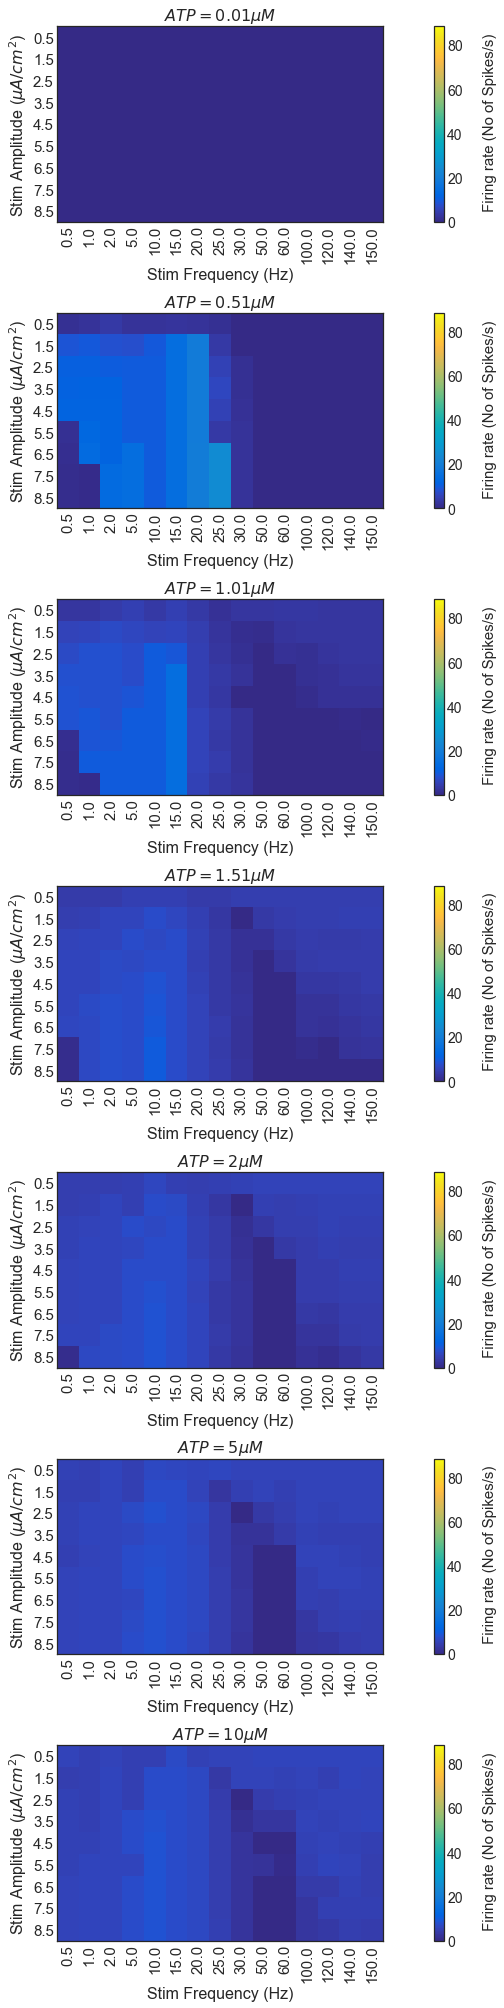

In [23]:
mpl.style.use('seaborn-white')
file = open("MOTIF2/atp_acstim_analysis_inh_1.pkl",'rb')
fr_dict = pkl.load(file)
atp = list(fr_dict.keys())

fig, ax_l = plt.subplots(len(atp),1, figsize=(15,28))
ac_amp = np.arange(0.5,9)
ac_freq = [0.5,1,2,5,10,15,20,25,30,50,60,100,120,140, 150]
yticks = [i for i in range(len(ac_amp))]
xticks = [i for i in range(len(ac_freq))]


for i in range(len(atp)):
    fr_array = np.array(fr_dict[atp[i]][0])*1000
    im = ax_l[i].imshow(fr_array, cmap=parula_map, vmin=0, vmax=max(max_fr_rate))
    ax_l[i].set_xticks(xticks)
    ax_l[i].set_xticklabels([float(i) for i in np.array(ac_freq)[xticks]], fontsize=15, rotation=90)
    ax_l[i].set_yticks(yticks)
    ax_l[i].set_yticklabels([i for i in np.array(ac_amp)[yticks]], fontsize=15, rotation=0)

    ax_l[i].set_ylabel('Stim Amplitude ($\mu A/cm^2$)', fontsize=16)
    ax_l[i].set_xlabel('Stim Frequency (Hz)', fontsize=16)
    cbar = plt.colorbar(im, ax=ax_l[i], fraction=0.03)
    cbar.set_label('\n Firing rate (No of Spikes/s)', rotation=90, fontsize=15)
    cbar.ax.tick_params(labelsize=14)

    ax_l[i].set_title('$ ATP = {} \mu M$'.format(atp[i]), fontsize=16)
plt.tight_layout()
plt.savefig('Results/motif2_atp_ACstim_PYR_inh.png', bbox_inches='tight')

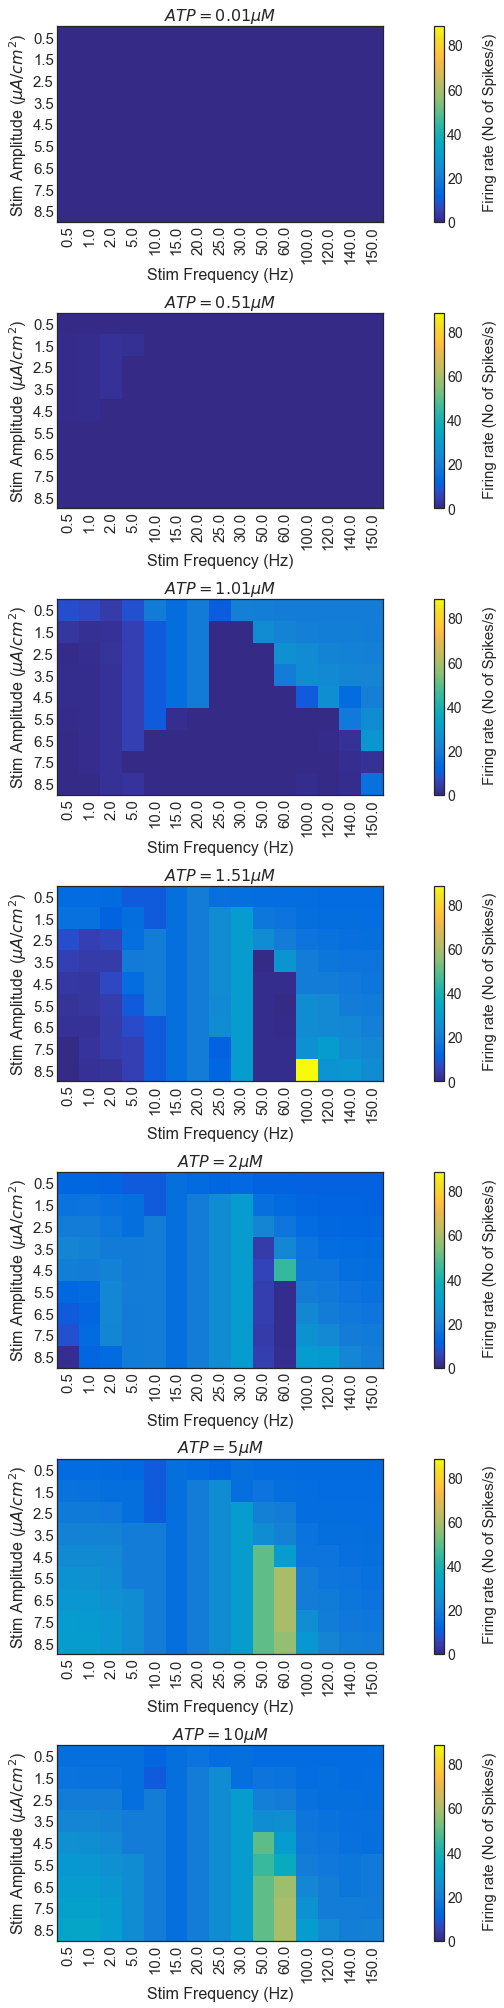

In [24]:
mpl.style.use('seaborn-white')
file = open("MOTIF2/atp_acstim_analysis_inh_1.pkl",'rb')
fr_dict = pkl.load(file)
atp = list(fr_dict.keys())

fig, ax_l = plt.subplots(len(atp),1, figsize=(15,28))
ac_amp = np.arange(0.5,9)
ac_freq = [0.5,1,2,5,10,15,20,25,30,50,60,100,120,140, 150]
yticks = [i for i in range(len(ac_amp))]
xticks = [i for i in range(len(ac_freq))]
max_fr = []
for i in range(len(atp)):
    fr_array = np.array(fr_dict[atp[i]][1])*1000
    max_fr.append(np.max(fr_array))
    
for i in range(len(atp)):
    fr_array = np.array(fr_dict[atp[i]][1])*1000
    im = ax_l[i].imshow(fr_array, cmap=parula_map,  vmin=0, vmax=max(max_fr_rate))
    ax_l[i].set_xticks(xticks)
    ax_l[i].set_xticklabels([float(i) for i in np.array(ac_freq)[xticks]], fontsize=15, rotation=90)
    ax_l[i].set_yticks(yticks)
    ax_l[i].set_yticklabels([i for i in np.array(ac_amp)[yticks]], fontsize=15, rotation=0)

    ax_l[i].set_ylabel('Stim Amplitude ($\mu A/cm^2$)', fontsize=16)
    ax_l[i].set_xlabel('Stim Frequency (Hz)', fontsize=16)
    cbar = plt.colorbar(im, ax=ax_l[i], fraction=0.03)
    cbar.set_label('\n Firing rate (No of Spikes/s)', rotation=90, fontsize=15)
    cbar.ax.tick_params(labelsize=14)

    ax_l[i].set_title('$ ATP = {} \mu M$'.format(atp[i]), fontsize=16)
plt.tight_layout()
plt.savefig('Results/motif2_atp_ACstim_INH_inh.png', bbox_inches='tight')
    

## DBS Stimulation

In [25]:
max_fr_rate = []
glue = [0, 0.06, 0.2, 0.29, 0.45]
file1 = open("MOTIF2/glutamate_dbsstim_analysis_bn_1.pkl",'rb')
file2 = open("MOTIF2/glutamate_dbsstim_analysis_pyr_1.pkl",'rb')
file3 = open("MOTIF2/glutamate_dbsstim_analysis_inh_1.pkl",'rb')
fr_dict1 = pkl.load(file1)
fr_dict2 = pkl.load(file2)
fr_dict3 = pkl.load(file3)
for i in range(len(glue)):
    fr_array1 = np.array(fr_dict1[glue[i]][0])*1000
    fr_array2 = np.array(fr_dict1[glue[i]][1])*1000
    max_fr_rate.append(np.max(np.array(fr_dict1[glue[i]][0])*1000))
    max_fr_rate.append(np.max(np.array(fr_dict1[glue[i]][1])*1000))
    max_fr_rate.append(np.max(np.array(fr_dict2[glue[i]][0])*1000))
    max_fr_rate.append(np.max(np.array(fr_dict2[glue[i]][1])*1000))
    max_fr_rate.append(np.max(np.array(fr_dict3[glue[i]][0])*1000))
    max_fr_rate.append(np.max(np.array(fr_dict3[glue[i]][1])*1000))

### Glutamate 

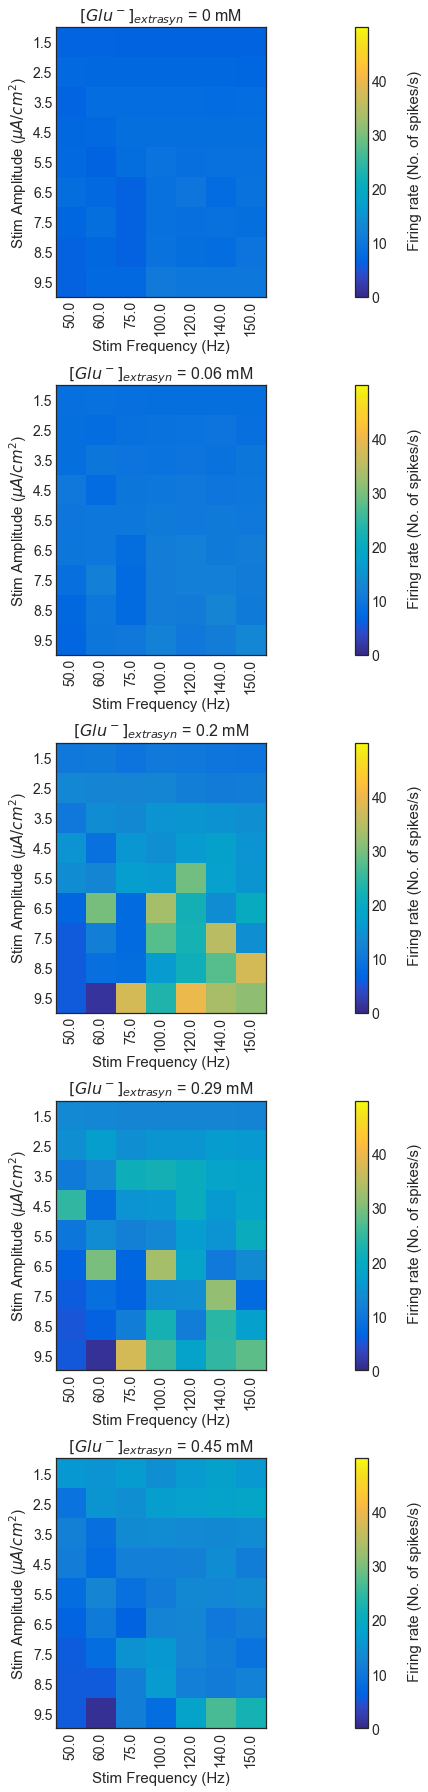

In [26]:
mpl.style.use('seaborn-white')
file = open("MOTIF2/glutamate_dbsstim_analysis_bn_1.pkl",'rb')
fr_dict = pkl.load(file)

glue = [0, 0.06, 0.2, 0.29, 0.45]
dbs_amp = np.arange(1.5,10.5)
dbs_f = [50,60,75,100,120,140,150]
yticks = [i for i in range(len(dbs_amp))]
xticks = [i for i in range(len(dbs_f))]

fig, ax_l = plt.subplots(len(glue), 1, figsize=(25,25))

max_fr1 = []
max_fr2 = []
for i in range(len(glue)):
    fr_array1 = np.array(fr_dict[glue[i]][0])*1000
    fr_array2 = np.array(fr_dict[glue[i]][1])*1000
    max_fr1.append(np.max(fr_array1))
    max_fr2.append(np.max(fr_array2))

for i in range(len(glue)):
    fr_array = np.array(fr_dict[glue[i]][0])*1000
    im = ax_l[i].imshow(fr_array, cmap=parula_map,  vmin = 0, vmax = max(max_fr_rate))
    ax_l[i].set_xticks(xticks)
    ax_l[i].set_xticklabels([float(i) for i in np.array(dbs_f)[xticks]], fontsize=14, rotation=90)
    ax_l[i].set_yticks(yticks)
    ax_l[i].set_yticklabels([i for i in np.array(dbs_amp)[yticks]], fontsize=14, rotation=0)

    ax_l[i].set_ylabel('Stim Amplitude ($\mu A/cm^2$)', fontsize=15)
    ax_l[i].set_xlabel('Stim Frequency (Hz)', fontsize=15)
    cbar = plt.colorbar(im, ax=ax_l[i], fraction=0.05)
    cbar.set_label('\n Firing rate (No. of spikes/s)', rotation=90, fontsize=15)
    cbar.ax.tick_params(labelsize=14)

    ax_l[i].set_title('$[Glu^-]_{extrasyn}$'+' = {} mM'.format(glue[i]), fontsize=16)


plt.tight_layout()
plt.savefig('Results/motif2_glutamate_DBSstim_PYR_bn.png', bbox_inches='tight')
    
    

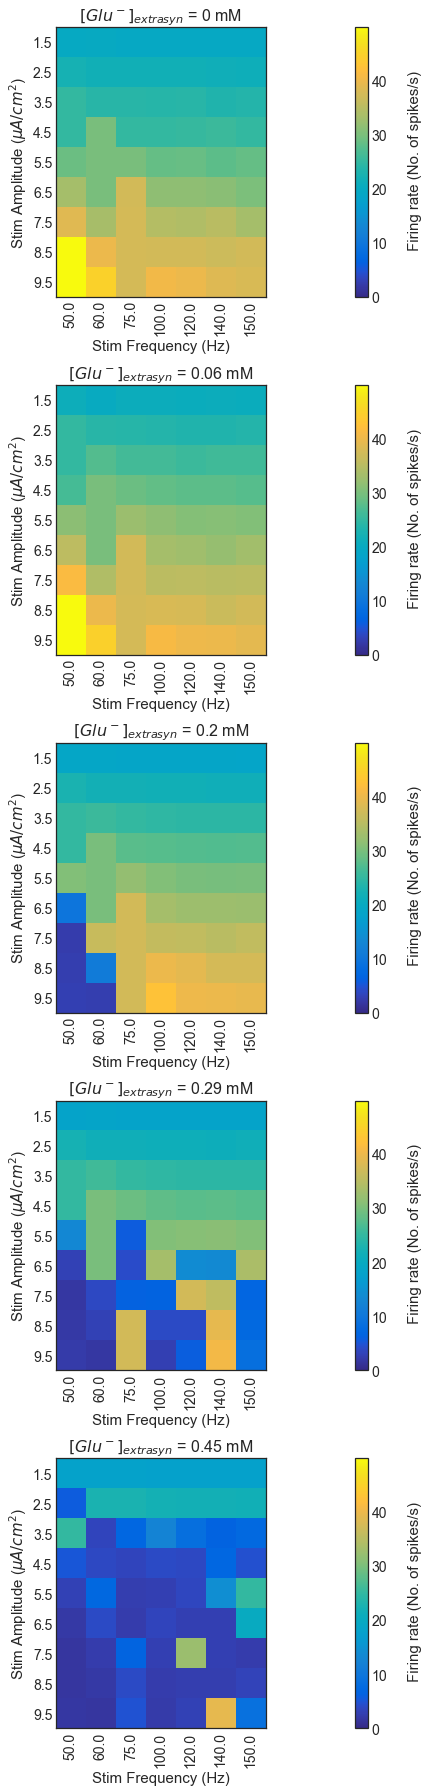

In [27]:
mpl.style.use('seaborn-white')
file = open("MOTIF2/glutamate_dbsstim_analysis_bn_1.pkl",'rb')
fr_dict = pkl.load(file)

glue = [0, 0.06, 0.2, 0.29, 0.45]
dbs_amp = np.arange(1.5,10.5)
dbs_f = [50,60,75,100,120,140,150]
yticks = [i for i in range(len(dbs_amp))]
xticks = [i for i in range(len(dbs_f))]

fig, ax_l = plt.subplots(len(glue), 1, figsize=(25,25))

max_fr1 = []

max_fr1 = []
max_fr2 = []
for i in range(len(glue)):
    fr_array1 = np.array(fr_dict[glue[i]][0])*1000
    fr_array2 = np.array(fr_dict[glue[i]][1])*1000
    max_fr1.append(np.max(fr_array1))
    max_fr2.append(np.max(fr_array2))

for i in range(len(glue)):
    fr_array = np.array(fr_dict[glue[i]][1])*1000
    im = ax_l[i].imshow(fr_array, cmap=parula_map, vmin = 0, vmax = max(max_fr_rate))
    ax_l[i].set_xticks(xticks)
    ax_l[i].set_xticklabels([float(i) for i in np.array(dbs_f)[xticks]], fontsize=14, rotation=90)
    ax_l[i].set_yticks(yticks)
    ax_l[i].set_yticklabels([i for i in np.array(dbs_amp)[yticks]], fontsize=14, rotation=0)

    ax_l[i].set_ylabel('Stim Amplitude ($\mu A/cm^2$)', fontsize=15)
    ax_l[i].set_xlabel('Stim Frequency (Hz)', fontsize=15)
    cbar = plt.colorbar(im, ax=ax_l[i], fraction=0.05)
    cbar.set_label('\n Firing rate (No. of spikes/s)', rotation=90, fontsize=15)
    cbar.ax.tick_params(labelsize=14)

    ax_l[i].set_title('$[Glu^-]_{extrasyn}$'+' = {} mM'.format(glue[i]), fontsize=16)


plt.tight_layout()
plt.savefig('Results/motif2_glutamate_DBSstim_INH_bn.png', bbox_inches='tight')
    
    

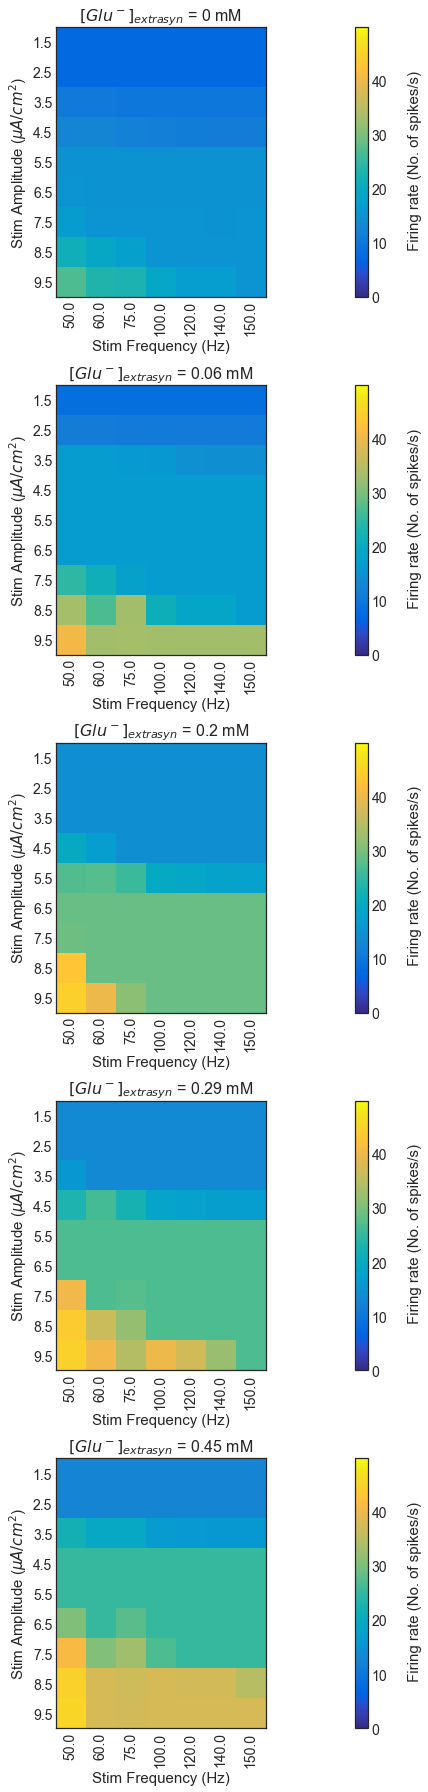

In [28]:
mpl.style.use('seaborn-white')
file = open("MOTIF2/glutamate_dbsstim_analysis_pyr_1.pkl",'rb')
fr_dict = pkl.load(file)

glue = [0, 0.06, 0.2, 0.29, 0.45]
dbs_amp = np.arange(1.5,10.5)
dbs_f = [50,60,75,100,120,140,150]
yticks = [i for i in range(len(dbs_amp))]
xticks = [i for i in range(len(dbs_f))]

fig, ax_l = plt.subplots(len(glue), 1, figsize=(25,25))

max_fr1 = []
max_fr2 = []
for i in range(len(glue)):
    fr_array1 = np.array(fr_dict[glue[i]][0])*1000
    fr_array2 = np.array(fr_dict[glue[i]][1])*1000
    max_fr1.append(np.max(fr_array1))
    max_fr2.append(np.max(fr_array2))

for i in range(len(glue)):
    fr_array = np.array(fr_dict[glue[i]][0])*1000
    im = ax_l[i].imshow(fr_array, cmap=parula_map,  vmin = 0, vmax = max(max_fr_rate))
    ax_l[i].set_xticks(xticks)
    ax_l[i].set_xticklabels([float(i) for i in np.array(dbs_f)[xticks]], fontsize=14, rotation=90)
    ax_l[i].set_yticks(yticks)
    ax_l[i].set_yticklabels([i for i in np.array(dbs_amp)[yticks]], fontsize=14, rotation=0)

    ax_l[i].set_ylabel('Stim Amplitude ($\mu A/cm^2$)', fontsize=15)
    ax_l[i].set_xlabel('Stim Frequency (Hz)', fontsize=15)
    cbar = plt.colorbar(im, ax=ax_l[i], fraction=0.05)
    cbar.set_label('\n Firing rate (No. of spikes/s)', rotation=90, fontsize=15)
    cbar.ax.tick_params(labelsize=14)

    ax_l[i].set_title('$[Glu^-]_{extrasyn}$'+' = {} mM'.format(glue[i]), fontsize=16)


plt.tight_layout()
plt.savefig('Results/motif2_glutamate_DBSstim_PYR_pyr.png', bbox_inches='tight')
    
    

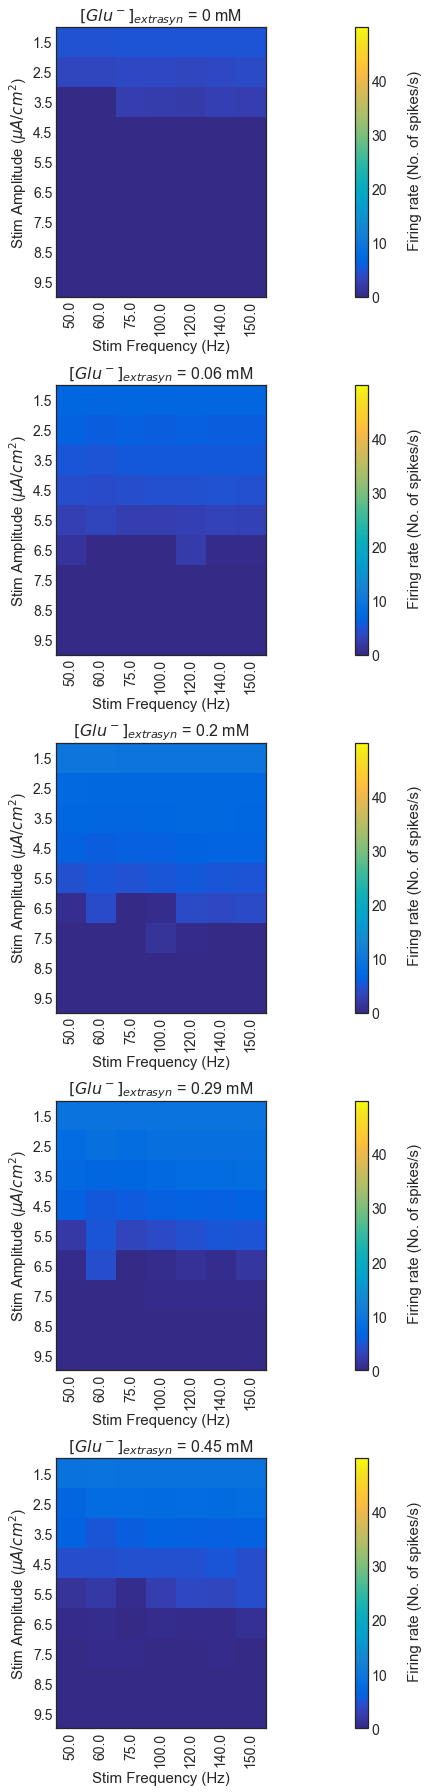

In [85]:
mpl.style.use('seaborn-white')
file = open("DATA_finalset/MOTIF2/stim/single/DBS/Glu/glutamate_dbsstim_analysis_inh_1.pkl",'rb')
fr_dict = pkl.load(file)

glue = [0, 0.06, 0.2, 0.29, 0.45]
dbs_amp = np.arange(1.5,10.5)
dbs_f = [50,60,75,100,120,140,150]
yticks = [i for i in range(len(dbs_amp))]
xticks = [i for i in range(len(dbs_f))]

fig, ax_l = plt.subplots(len(glue), 1, figsize=(25,25))


max_fr1 = []
max_fr2 = []
for i in range(len(glue)):
    fr_array1 = np.array(fr_dict[glue[i]][0])*1000
    fr_array2 = np.array(fr_dict[glue[i]][1])*1000
    max_fr1.append(np.max(fr_array1))
    max_fr2.append(np.max(fr_array2))

for i in range(len(glue)):
    fr_array = np.array(fr_dict[glue[i]][0])*1000
    im = ax_l[i].imshow(fr_array, cmap=parula_map,  vmin = 0, vmax = max(max_fr_rate))
    ax_l[i].set_xticks(xticks)
    ax_l[i].set_xticklabels([float(i) for i in np.array(dbs_f)[xticks]], fontsize=14, rotation=90)
    ax_l[i].set_yticks(yticks)
    ax_l[i].set_yticklabels([i for i in np.array(dbs_amp)[yticks]], fontsize=14, rotation=0)

    ax_l[i].set_ylabel('Stim Amplitude ($\mu A/cm^2$)', fontsize=15)
    ax_l[i].set_xlabel('Stim Frequency (Hz)', fontsize=15)
    cbar = plt.colorbar(im, ax=ax_l[i], fraction=0.05)
    cbar.set_label('\n Firing rate (No. of spikes/s)', rotation=90, fontsize=15)
    cbar.ax.tick_params(labelsize=14)

    ax_l[i].set_title('$[Glu^-]_{extrasyn}$'+' = {} mM'.format(glue[i]), fontsize=16)


plt.tight_layout()
plt.savefig('Results/motif2_glutamate_DBSstim_PYR_inh.png', bbox_inches='tight')
    
    

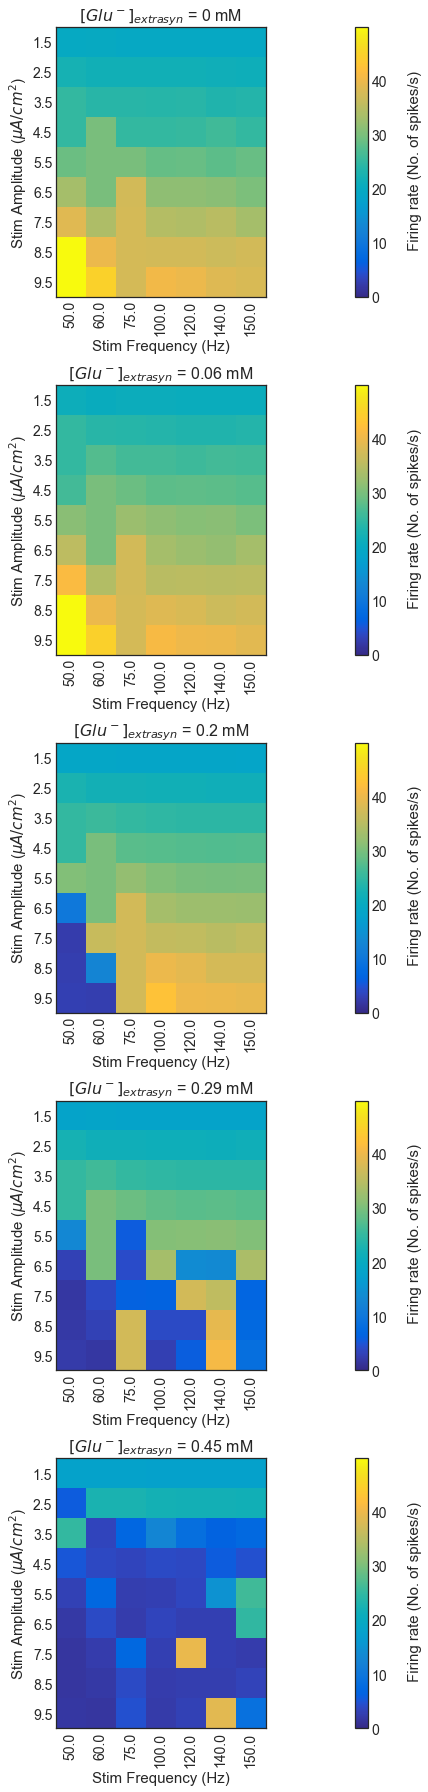

In [86]:
mpl.style.use('seaborn-white')
file = open("DATA_finalset/MOTIF2/stim/single/DBS/Glu/glutamate_dbsstim_analysis_inh_1.pkl",'rb')
fr_dict = pkl.load(file)

glue = [0, 0.06, 0.2, 0.29, 0.45]
dbs_amp = np.arange(1.5,10.5)
dbs_f = [50,60,75,100,120,140,150]
yticks = [i for i in range(len(dbs_amp))]
xticks = [i for i in range(len(dbs_f))]

fig, ax_l = plt.subplots(len(glue), 1, figsize=(25,25))


max_fr1 = []
max_fr2 = []
for i in range(len(glue)):
    fr_array1 = np.array(fr_dict[glue[i]][0])*1000
    fr_array2 = np.array(fr_dict[glue[i]][1])*1000
    max_fr1.append(np.max(fr_array1))
    max_fr2.append(np.max(fr_array2))

for i in range(len(glue)):
    fr_array = np.array(fr_dict[glue[i]][1])*1000
    im = ax_l[i].imshow(fr_array, cmap=parula_map, vmin = 0, vmax = max(max_fr_rate))
    ax_l[i].set_xticks(xticks)
    ax_l[i].set_xticklabels([float(i) for i in np.array(dbs_f)[xticks]], fontsize=14, rotation=90)
    ax_l[i].set_yticks(yticks)
    ax_l[i].set_yticklabels([i for i in np.array(dbs_amp)[yticks]], fontsize=14, rotation=0)

    ax_l[i].set_ylabel('Stim Amplitude ($\mu A/cm^2$)', fontsize=15)
    ax_l[i].set_xlabel('Stim Frequency (Hz)', fontsize=15)
    cbar = plt.colorbar(im, ax=ax_l[i], fraction=0.05)
    cbar.set_label('\n Firing rate (No. of spikes/s)', rotation=90, fontsize=15)
    cbar.ax.tick_params(labelsize=14)

    ax_l[i].set_title('$[Glu^-]_{extrasyn}$'+' = {} mM'.format(glue[i]), fontsize=16)


plt.tight_layout()
plt.savefig('Results/motif2_glutamate_DBSstim_INH_inh.png', bbox_inches='tight')
    
    

### Ko

In [29]:
max_fr_rate = []
#file1 = open("DATA_finalset/MOTIF2/stim/single/DBS/Ko/Ko_dbsstim_analysis_bn_1.pkl",'rb')
file2 = open("MOTIF2/Ko_dbsstim_analysis_pyr_1.pkl",'rb')
file3 = open("MOTIF2/Ko_dbsstim_analysis_inh_1.pkl",'rb')

#fr_dict1 = pkl.load(file1)
fr_dict2 = pkl.load(file2)
fr_dict3 = pkl.load(file3)
ko = list(fr_dict2.keys())
for i in range(len(ko)):
    #max_fr_rate.append(np.max(np.array(fr_dict1[ko[i]][0])*1000))
    #max_fr_rate.append(np.max(np.array(fr_dict1[ko[i]][1])*1000))
    max_fr_rate.append(np.max(np.array(fr_dict2[ko[i]][0])*1000))
    max_fr_rate.append(np.max(np.array(fr_dict2[ko[i]][1])*1000))
    max_fr_rate.append(np.max(np.array(fr_dict3[ko[i]][0])*1000))
    max_fr_rate.append(np.max(np.array(fr_dict3[ko[i]][1])*1000))

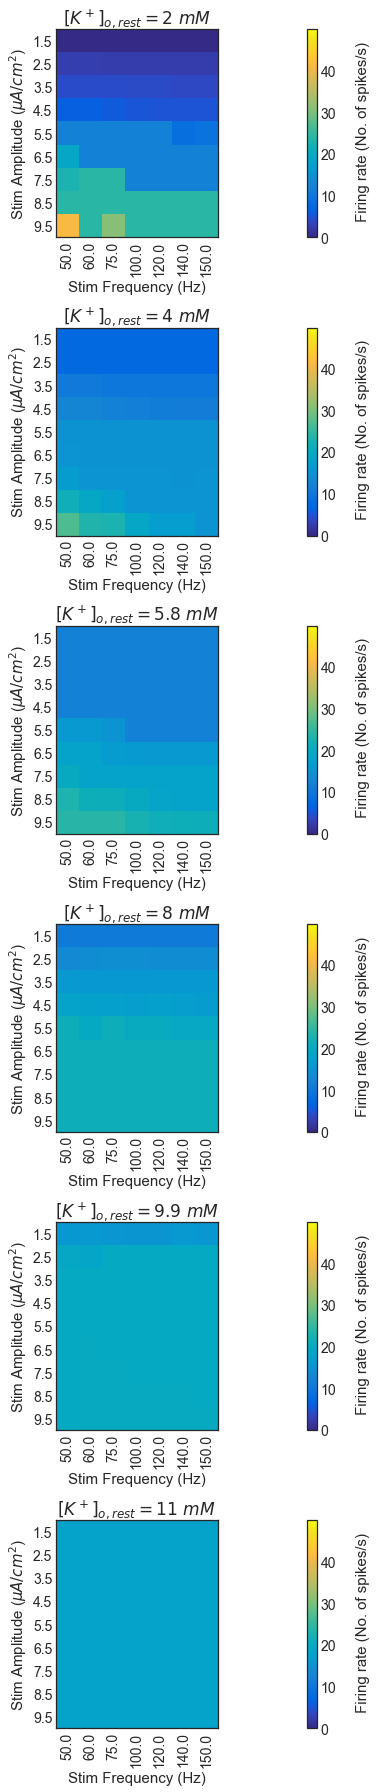

In [30]:
mpl.style.use('seaborn-white')
file = open("MOTIF2/Ko_dbsstim_analysis_pyr_1.pkl",'rb')
fr_dict = pkl.load(file)

ko = list(fr_dict.keys())
dbs_amp = np.arange(1.5,10.5)
dbs_f = [50,60,75,100,120,140,150]
yticks = [i for i in range(len(dbs_amp))]
xticks = [i for i in range(len(dbs_f))]

fig, ax_l = plt.subplots(len(ko), 1, figsize=(25,25))



for i in range(len(ko)):
    fr_array = np.array(fr_dict[ko[i]][0])*1000
    im = ax_l[i].imshow(fr_array, cmap=parula_map,  vmin = 0, vmax = max(max_fr_rate))
    ax_l[i].set_xticks(xticks)
    ax_l[i].set_xticklabels([float(i) for i in np.array(dbs_f)[xticks]], fontsize=14, rotation=90)
    ax_l[i].set_yticks(yticks)
    ax_l[i].set_yticklabels([i for i in np.array(dbs_amp)[yticks]], fontsize=14, rotation=0)

    ax_l[i].set_ylabel('Stim Amplitude ($\mu A/cm^2$)', fontsize=15)
    ax_l[i].set_xlabel('Stim Frequency (Hz)', fontsize=15)
    cbar = plt.colorbar(im, ax=ax_l[i], fraction=0.05)
    cbar.set_label('\n Firing rate (No. of spikes/s)', rotation=90, fontsize=15)
    cbar.ax.tick_params(labelsize=14)

    ax_l[i].set_title('$[K^+]_{o,rest}$'+'$ = {} \ mM$'.format(ko[i]), fontsize=17)
plt.tight_layout()
plt.savefig('Results/motif2_Ko_DBSstim_PYR_pyr.png', bbox_inches='tight')
    
    

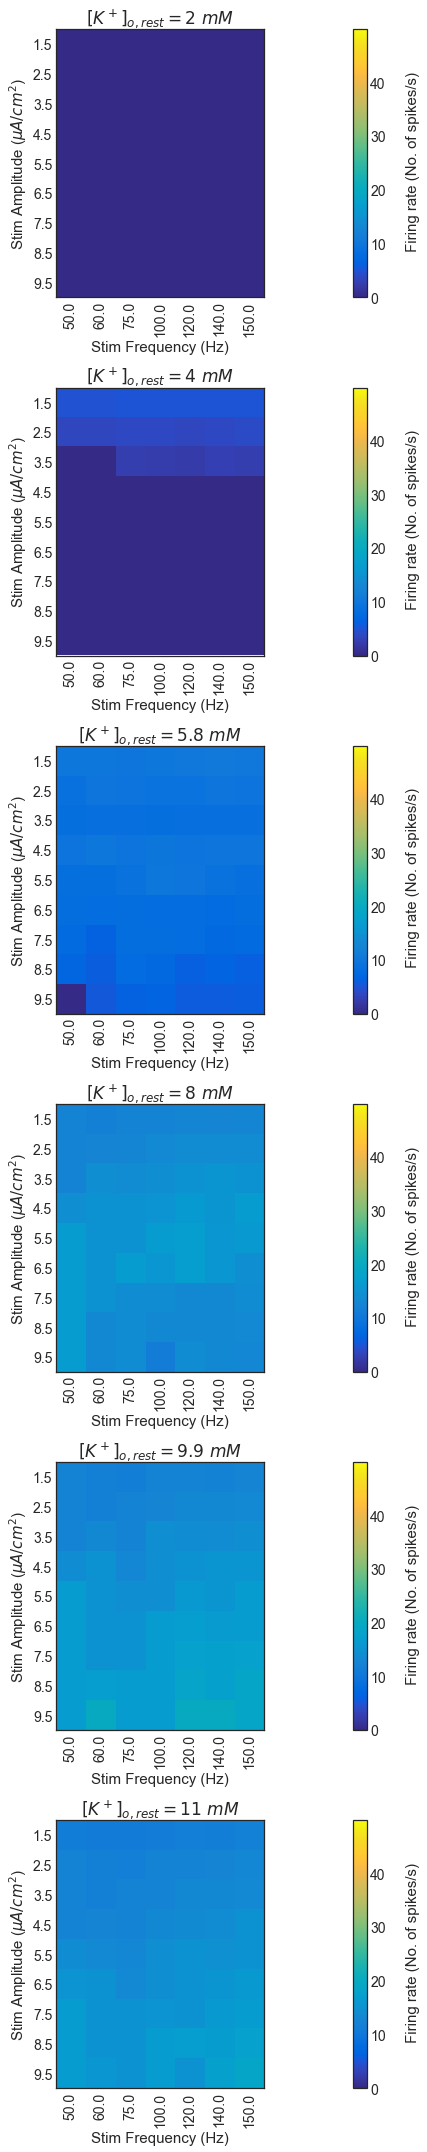

In [32]:
mpl.style.use('seaborn-white')
file = open("MOTIF2/Ko_dbsstim_analysis_inh_1.pkl",'rb')
fr_dict = pkl.load(file)

ko = list(fr_dict.keys())
dbs_amp = np.arange(1.5,10.5)
dbs_f = [50,60,75,100,120,140,150]
yticks = [i for i in range(len(dbs_amp))]
xticks = [i for i in range(len(dbs_f))]

fig, ax_l = plt.subplots(len(ko), 1, figsize=(25,30))




for i in range(len(ko)):
    fr_array = np.array(fr_dict[ko[i]][0])*1000
    im = ax_l[i].imshow(fr_array, cmap=parula_map, vmin = 0, vmax = max(max_fr_rate))
    ax_l[i].set_xticks(xticks)
    ax_l[i].set_xticklabels([float(i) for i in np.array(dbs_f)[xticks]], fontsize=14, rotation=90)
    ax_l[i].set_yticks(yticks)
    ax_l[i].set_yticklabels([i for i in np.array(dbs_amp)[yticks]], fontsize=14, rotation=0)

    ax_l[i].set_ylabel('Stim Amplitude ($\mu A/cm^2$)', fontsize=15)
    ax_l[i].set_xlabel('Stim Frequency (Hz)', fontsize=15)
    cbar = plt.colorbar(im, ax=ax_l[i], fraction=0.05)
    cbar.set_label('\n Firing rate (No. of spikes/s)', rotation=90, fontsize=15)
    cbar.ax.tick_params(labelsize=14)

    ax_l[i].set_title('$[K^+]_{o,rest}$'+'$ = {} \ mM$'.format(ko[i]), fontsize=17)
plt.tight_layout()
plt.savefig('Results/motif2_Ko_DBSstim_PYR_inh.png', bbox_inches='tight')
    
    

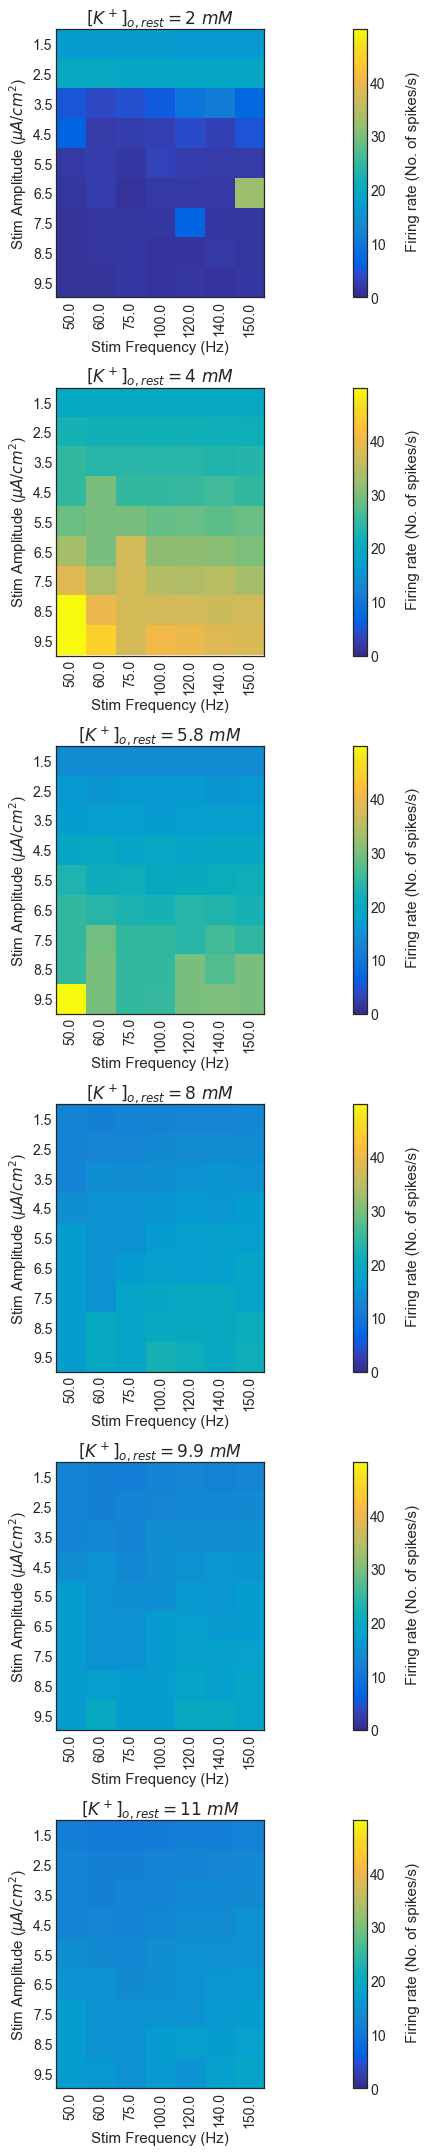

In [33]:
mpl.style.use('seaborn-white')
file = open("MOTIF2/Ko_dbsstim_analysis_inh_1.pkl",'rb')
fr_dict = pkl.load(file)

ko = list(fr_dict.keys())
dbs_amp = np.arange(1.5,10.5)
dbs_f = [50,60,75,100,120,140,150]
yticks = [i for i in range(len(dbs_amp))]
xticks = [i for i in range(len(dbs_f))]

fig, ax_l = plt.subplots(len(ko), 1, figsize=(25,30))


max_fr1 = []
max_fr2 = []
for i in range(len(ko)):
    fr_array1 = np.array(fr_dict[ko[i]][0])*1000
    fr_array2 = np.array(fr_dict[ko[i]][1])*1000
    max_fr1.append(np.max(fr_array1))
    max_fr2.append(np.max(fr_array2))
for i in range(len(ko)):
    fr_array = np.array(fr_dict[ko[i]][1])*1000
    im = ax_l[i].imshow(fr_array, cmap=parula_map,  vmin = 0, vmax = max(max(max_fr1), max(max_fr2)))
    ax_l[i].set_xticks(xticks)
    ax_l[i].set_xticklabels([float(i) for i in np.array(dbs_f)[xticks]], fontsize=14, rotation=90)
    ax_l[i].set_yticks(yticks)
    ax_l[i].set_yticklabels([i for i in np.array(dbs_amp)[yticks]], fontsize=14, rotation=0)

    ax_l[i].set_ylabel('Stim Amplitude ($\mu A/cm^2$)', fontsize=15)
    ax_l[i].set_xlabel('Stim Frequency (Hz)', fontsize=15)
    cbar = plt.colorbar(im, ax=ax_l[i], fraction=0.05)
    cbar.set_label('\n Firing rate (No. of spikes/s)', rotation=90, fontsize=15)
    cbar.ax.tick_params(labelsize=14)

    ax_l[i].set_title('$[K^+]_{o,rest}$' + '$ = {} \ mM$'.format(ko[i]), fontsize=17)
plt.tight_layout()
plt.savefig('Results/motif2_Ko_DBSstim_INH_inh.png', bbox_inches='tight')
    
    

### ATP

In [34]:
max_fr_rate = []
file1 = open("MOTIF2/atp_dbsstim_analysis_bn_1.pkl",'rb')
file2 = open("MOTIF2/atp_dbsstim_analysis_pyr_1.pkl",'rb')
file3 = open("MOTIF2/atp_dbsstim_analysis_inh_1.pkl",'rb')

fr_dict1 = pkl.load(file1)
fr_dict2 = pkl.load(file2)
fr_dict3 = pkl.load(file3)
atp = list(fr_dict1.keys())
for i in range(len(atp)):
    max_fr_rate.append(np.max(np.array(fr_dict1[atp[i]][0])*1000))
    max_fr_rate.append(np.max(np.array(fr_dict1[atp[i]][1])*1000))
    max_fr_rate.append(np.max(np.array(fr_dict2[atp[i]][0])*1000))
    max_fr_rate.append(np.max(np.array(fr_dict2[atp[i]][1])*1000))
    max_fr_rate.append(np.max(np.array(fr_dict3[atp[i]][0])*1000))
    max_fr_rate.append(np.max(np.array(fr_dict3[atp[i]][1])*1000))

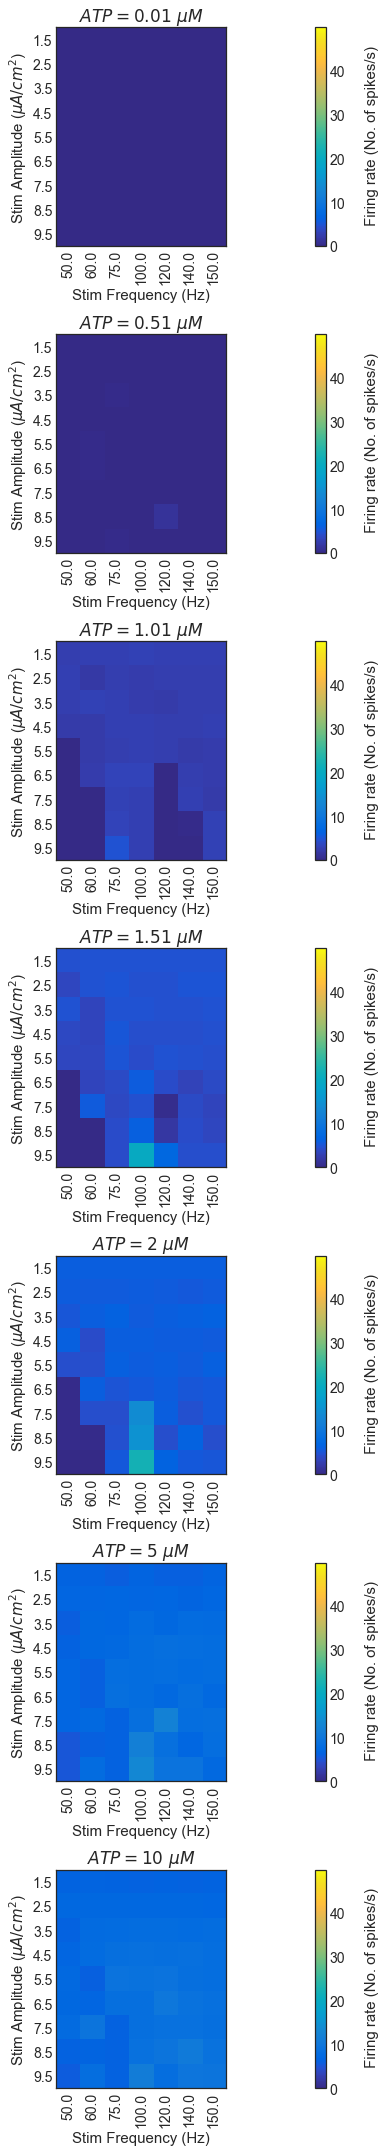

In [35]:
mpl.style.use('seaborn-white')
file = open("MOTIF2/atp_dbsstim_analysis_bn_1.pkl",'rb')
fr_dict = pkl.load(file)

atp = list(fr_dict.keys())
dbs_amp = np.arange(1.5,10.5)
dbs_f = [50,60,75,100,120,140,150]
yticks = [i for i in range(len(dbs_amp))]
xticks = [i for i in range(len(dbs_f))]

fig, ax_l = plt.subplots(len(atp), 1, figsize=(25,30))

max_fr1 = []
max_fr2 = []
for i in range(len(atp)):
    fr_array1 = np.array(fr_dict[atp[i]][0])*1000
    fr_array2 = np.array(fr_dict[atp[i]][1])*1000
    max_fr1.append(np.max(fr_array1))
    max_fr2.append(np.max(fr_array2))

for i in range(len(atp)):
    fr_array = np.array(fr_dict[atp[i]][0])*1000
    im = ax_l[i].imshow(fr_array, cmap=parula_map, vmin = 0, vmax = max(max_fr_rate))
    ax_l[i].set_xticks(xticks)
    ax_l[i].set_xticklabels([float(i) for i in np.array(dbs_f)[xticks]], fontsize=14, rotation=90)
    ax_l[i].set_yticks(yticks)
    ax_l[i].set_yticklabels([i for i in np.array(dbs_amp)[yticks]], fontsize=14, rotation=0)

    ax_l[i].set_ylabel('Stim Amplitude ($\mu A/cm^2$)', fontsize=15)
    ax_l[i].set_xlabel('Stim Frequency (Hz)', fontsize=15)
    cbar = plt.colorbar(im, ax=ax_l[i], fraction=0.05)
    cbar.set_label('\n Firing rate (No. of spikes/s)', rotation=90, fontsize=15)
    cbar.ax.tick_params(labelsize=14)

    ax_l[i].set_title('$ATP = {} \ \mu M$'.format(atp[i]), fontsize=17)
plt.tight_layout()
plt.savefig('Results/motif2_ATP_DBSstim_PYR_bn.png', bbox_inches='tight')
    
    

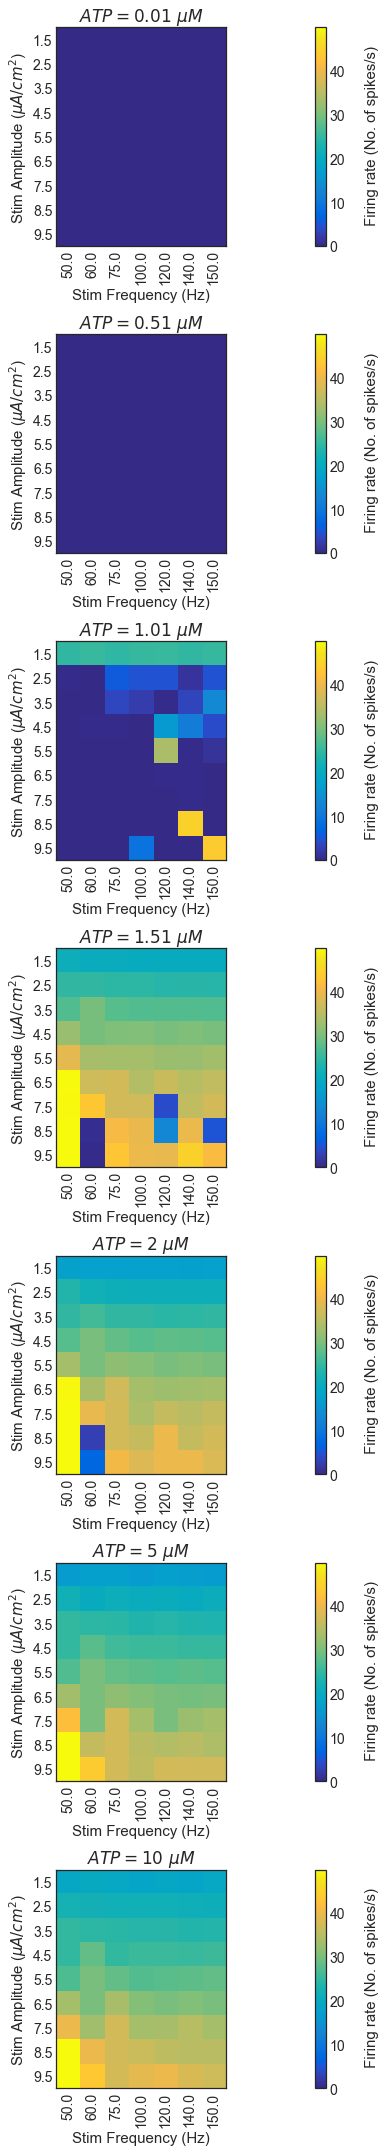

In [36]:
mpl.style.use('seaborn-white')
file = open("MOTIF2/atp_dbsstim_analysis_bn_1.pkl",'rb')
fr_dict = pkl.load(file)

atp = list(fr_dict.keys())
dbs_amp = np.arange(1.5,10.5)
dbs_f = [50,60,75,100,120,140,150]
yticks = [i for i in range(len(dbs_amp))]
xticks = [i for i in range(len(dbs_f))]

fig, ax_l = plt.subplots(len(atp), 1, figsize=(25,30))

max_fr1 = []
max_fr2 = []
for i in range(len(atp)):
    fr_array1 = np.array(fr_dict[atp[i]][0])*1000
    fr_array2 = np.array(fr_dict[atp[i]][1])*1000
    max_fr1.append(np.max(fr_array1))
    max_fr2.append(np.max(fr_array2))

for i in range(len(atp)):
    fr_array = np.array(fr_dict[atp[i]][1])*1000
    im = ax_l[i].imshow(fr_array, cmap=parula_map, vmin = 0,vmax = max(max_fr_rate))
    ax_l[i].set_xticks(xticks)
    ax_l[i].set_xticklabels([float(i) for i in np.array(dbs_f)[xticks]], fontsize=14, rotation=90)
    ax_l[i].set_yticks(yticks)
    ax_l[i].set_yticklabels([i for i in np.array(dbs_amp)[yticks]], fontsize=14, rotation=0)

    ax_l[i].set_ylabel('Stim Amplitude ($\mu A/cm^2$)', fontsize=15)
    ax_l[i].set_xlabel('Stim Frequency (Hz)', fontsize=15)
    cbar = plt.colorbar(im, ax=ax_l[i], fraction=0.05)
    cbar.set_label('\n Firing rate (No. of spikes/s)', rotation=90, fontsize=15)
    cbar.ax.tick_params(labelsize=14)

    ax_l[i].set_title('$ATP = {} \ \mu M$'.format(atp[i]), fontsize=17)
plt.tight_layout()
plt.savefig('Results/motif2_ATP_DBSstim_INH_bn.png', bbox_inches='tight')
    
    

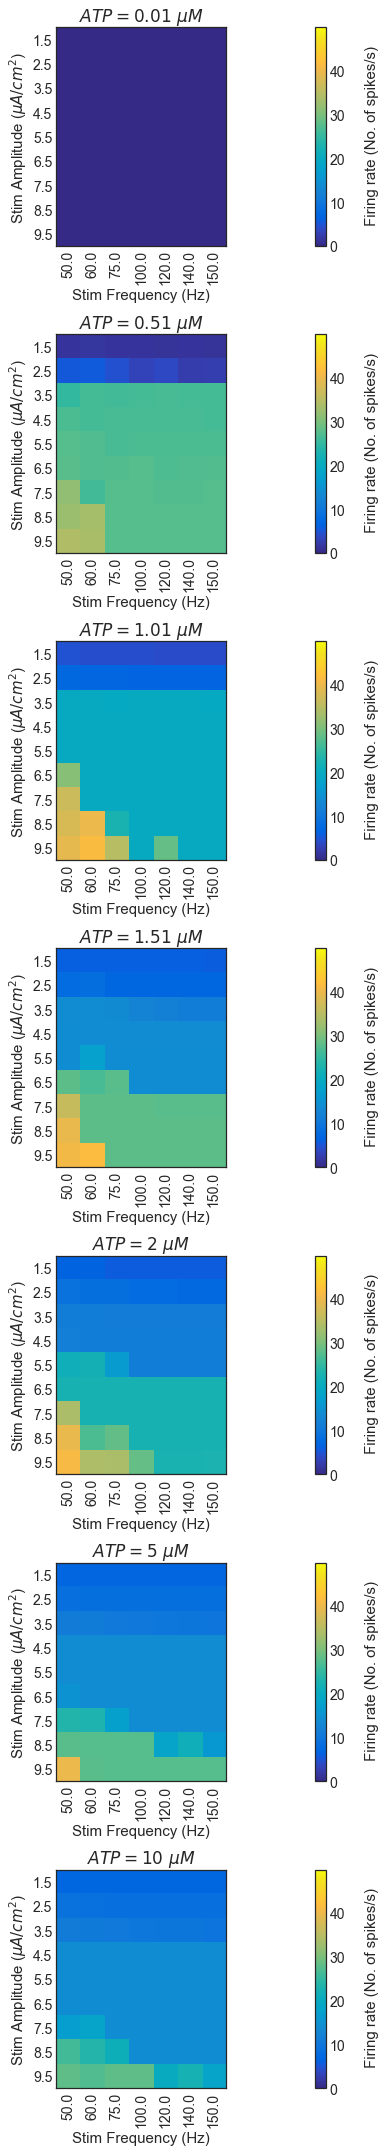

In [37]:
mpl.style.use('seaborn-white')
file = open("MOTIF2/atp_dbsstim_analysis_pyr_1.pkl",'rb')
fr_dict = pkl.load(file)

atp = list(fr_dict.keys())
dbs_amp = np.arange(1.5,10.5)
dbs_f = [50,60,75,100,120,140,150]
yticks = [i for i in range(len(dbs_amp))]
xticks = [i for i in range(len(dbs_f))]

fig, ax_l = plt.subplots(len(atp), 1, figsize=(25,30))

max_fr = []

for i in range(len(atp)):
    fr_array = np.array(fr_dict[atp[i]][0])*1000
    max_fr.append(np.max(fr_array))

for i in range(len(atp)):
    fr_array = np.array(fr_dict[atp[i]][0])*1000
    im = ax_l[i].imshow(fr_array, cmap=parula_map,  vmin = 0, vmax = max(max_fr_rate))
    ax_l[i].set_xticks(xticks)
    ax_l[i].set_xticklabels([float(i) for i in np.array(dbs_f)[xticks]], fontsize=14, rotation=90)
    ax_l[i].set_yticks(yticks)
    ax_l[i].set_yticklabels([i for i in np.array(dbs_amp)[yticks]], fontsize=14, rotation=0)

    ax_l[i].set_ylabel('Stim Amplitude ($\mu A/cm^2$)', fontsize=15)
    ax_l[i].set_xlabel('Stim Frequency (Hz)', fontsize=15)
    cbar = plt.colorbar(im, ax=ax_l[i], fraction=0.05)
    cbar.set_label('\n Firing rate (No. of spikes/s)', rotation=90, fontsize=15)
    cbar.ax.tick_params(labelsize=14)

    ax_l[i].set_title('$ATP = {} \ \mu M$'.format(atp[i]), fontsize=17)
plt.tight_layout()
plt.savefig('Results/motif2_ATP_DBSstim_PYR_pyr.png', bbox_inches='tight')
    
    

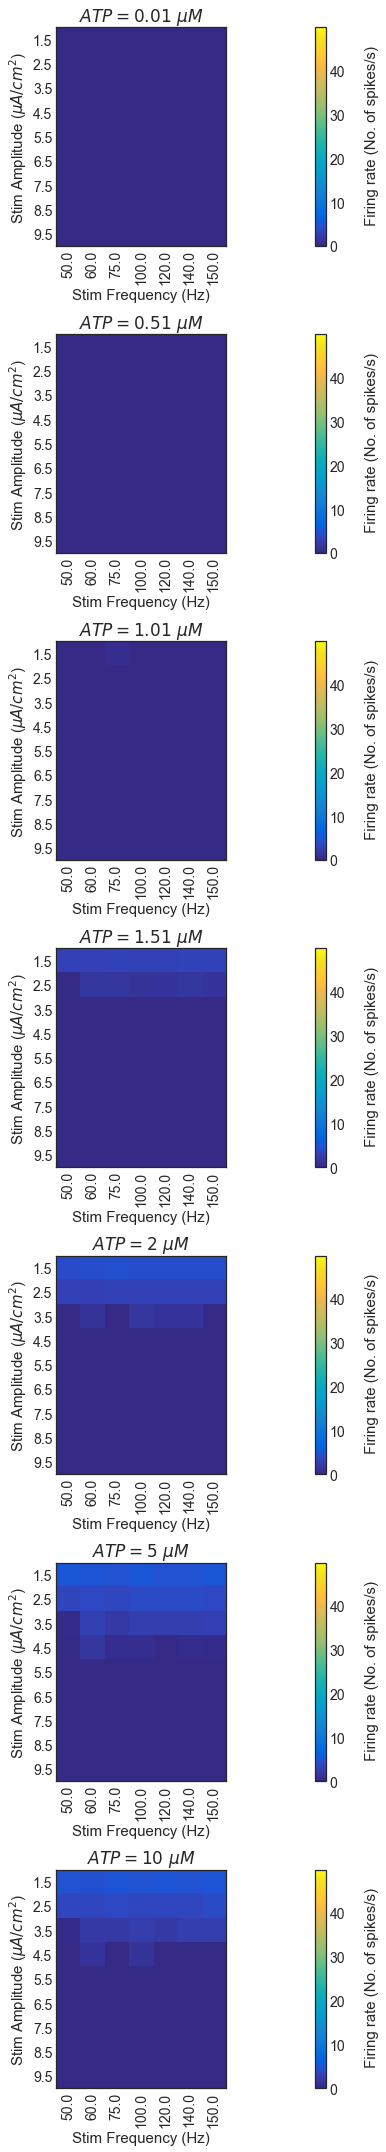

In [38]:
mpl.style.use('seaborn-white')
file = open("MOTIF2/atp_dbsstim_analysis_inh_1.pkl",'rb')
fr_dict = pkl.load(file)

atp = list(fr_dict.keys())
dbs_amp = np.arange(1.5,10.5)
dbs_f = [50,60,75,100,120,140,150]
yticks = [i for i in range(len(dbs_amp))]
xticks = [i for i in range(len(dbs_f))]

fig, ax_l = plt.subplots(len(atp), 1, figsize=(25,30))

max_fr1 = []
max_fr2 = []
for i in range(len(atp)):
    fr_array1 = np.array(fr_dict[atp[i]][0])*1000
    fr_array2 = np.array(fr_dict[atp[i]][1])*1000
    max_fr1.append(np.max(fr_array1))
    max_fr2.append(np.max(fr_array2))

for i in range(len(atp)):
    fr_array = np.array(fr_dict[atp[i]][0])*1000
    im = ax_l[i].imshow(fr_array, cmap=parula_map,  vmin = 0, vmax = max(max_fr_rate))
    ax_l[i].set_xticks(xticks)
    ax_l[i].set_xticklabels([float(i) for i in np.array(dbs_f)[xticks]], fontsize=14, rotation=90)
    ax_l[i].set_yticks(yticks)
    ax_l[i].set_yticklabels([i for i in np.array(dbs_amp)[yticks]], fontsize=14, rotation=0)

    ax_l[i].set_ylabel('Stim Amplitude ($\mu A/cm^2$)', fontsize=15)
    ax_l[i].set_xlabel('Stim Frequency (Hz)', fontsize=15)
    cbar = plt.colorbar(im, ax=ax_l[i], fraction=0.05)
    cbar.set_label('\n Firing rate (No. of spikes/s)', rotation=90, fontsize=15)
    cbar.ax.tick_params(labelsize=14)

    ax_l[i].set_title('$ATP = {} \ \mu M$'.format(atp[i]), fontsize=17)
plt.tight_layout()
plt.savefig('Results/motif2_ATP_DBSstim_PYR_inh.png', bbox_inches='tight')
    
    

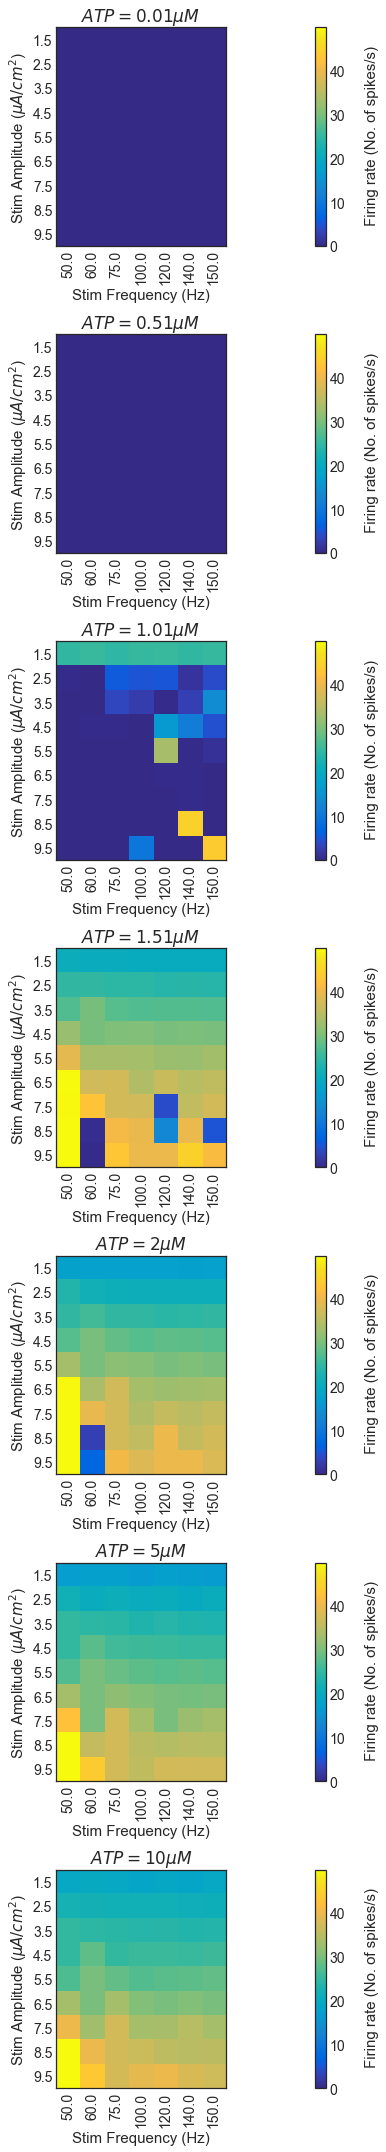

In [39]:
mpl.style.use('seaborn-white')
file = open("MOTIF2/atp_dbsstim_analysis_inh_1.pkl",'rb')
fr_dict = pkl.load(file)

atp = list(fr_dict.keys())
dbs_amp = np.arange(1.5,10.5)
dbs_f = [50,60,75,100,120,140,150]
yticks = [i for i in range(len(dbs_amp))]
xticks = [i for i in range(len(dbs_f))]

fig, ax_l = plt.subplots(len(atp), 1, figsize=(25,30))

max_fr1 = []
max_fr2 = []
for i in range(len(atp)):
    fr_array1 = np.array(fr_dict[atp[i]][0])*1000
    fr_array2 = np.array(fr_dict[atp[i]][1])*1000
    max_fr1.append(np.max(fr_array1))
    max_fr2.append(np.max(fr_array2))

for i in range(len(atp)):
    fr_array = np.array(fr_dict[atp[i]][1])*1000
    im = ax_l[i].imshow(fr_array, cmap=parula_map,  vmin = 0, vmax = max(max_fr_rate))
    ax_l[i].set_xticks(xticks)
    ax_l[i].set_xticklabels([float(i) for i in np.array(dbs_f)[xticks]], fontsize=14, rotation=90)
    ax_l[i].set_yticks(yticks)
    ax_l[i].set_yticklabels([i for i in np.array(dbs_amp)[yticks]], fontsize=14, rotation=0)

    ax_l[i].set_ylabel('Stim Amplitude ($\mu A/cm^2$)', fontsize=15)
    ax_l[i].set_xlabel('Stim Frequency (Hz)', fontsize=15)
    cbar = plt.colorbar(im, ax=ax_l[i], fraction=0.05)
    cbar.set_label('\n Firing rate (No. of spikes/s)', rotation=90, fontsize=15)
    cbar.ax.tick_params(labelsize=14)

    ax_l[i].set_title('$ATP = {} \mu M$'.format(atp[i]), fontsize=17)
plt.tight_layout()
plt.savefig('Results/motif2_ATP_DBSstim_INH_inh.png', bbox_inches='tight')
    
    